
* [Transcation Data Analysis](#Trancastion_data)
    * [Data import](#Data_import)
    * [EDA](#EDA)
    * [Data Transformation](#data_transform)
* [Behaviour Data](#behaviour)
* [K Means CLustering](#cluster)
* [apply() on multiple columns](#apply_multiple)
* [describe()](#describe)
* [sort_values()](#sort)
* [corr()](#corr)
* [idxmin and idxmax](#idx)
* [value_counts](#v_c)
* [replace](#replace)
* [unique and nunique](#uni)
* [map](#map)
* [duplicated and drop_duplicates](#dup)
* [between](#bet)
* [sample](#sample)
* [nlargest](#n)

In [444]:
# Import required libraries
import pyodbc # SQL library
import pandas as pd # Dataframes
import numpy as np # Arrays
import matplotlib.pyplot as plt # Graphs
plt.style.use('ggplot') # ggplot style
import seaborn as sns # Enhanced plot library
from sklearn.preprocessing import RobustScaler # To scale data
from sklearn.cluster import KMeans # K-means clustering
from sklearn.model_selection import train_test_split # To randomly split the dataset
from xverse.transformer import WOE # To perform Weight of Evidence for feature selection
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import accuracy_score # Accuracy for model assessment
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees
from sklearn.feature_selection import SelectKBest, chi2 # K best and Chi square
from sklearn.svm import LinearSVC # Linear SVC for L1 feature selection
from sklearn.feature_selection import SelectFromModel # L1 feature selection
from functools import reduce # To merge dataframes
from statsmodels.stats.outliers_influence import variance_inflation_factor # Multicollinearity check
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.metrics import fbeta_score # fbeta score for model assessment
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.preprocessing import MinMaxScaler # To scale data for SVC
from sklearn.svm import SVC # Support Vector Machine
from sklearn.model_selection import validation_curve, StratifiedKFold, GridSearchCV # For model tuning
from sklearn.metrics import confusion_matrix, classification_report # For model evaluation
import joblib # To save the final model
from datetime import timedelta # To define potential churn date
from warnings import simplefilter # Warnings filter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression#it is actually classification regression
from sklearn.model_selection import train_test_split, GridSearchCV # Modules for splitting our data 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import FeatureUnion, make_pipeline


<a id='Trancastion_data'></a>

## Transcation Data Analysis

<a id='Data_import'></a>

### Data Import (SQL)

In [445]:
import pyodbc 
import pandas as pd
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-QEC24C4;'
                      'Database=AdventureWorksDW2017;' 
                      'Trusted_Connection=yes;')


sql_for_df1 = """SELECT [CustomerKey],[SalesOrderNumber],[SalesOrderLineNumber],
                 DP.EnglishProductName AS [Product Name],[OrderDate],[OrderQuantity],
                 [SalesAmount] AS [Total Sales],[TotalProductCost] AS [Total Cost]
                 FROM [dbo].[FactInternetSales] as FI \
                 LEFT JOIN [dbo].[DimProduct] AS DP \
                 on DP.ProductKey = FI.ProductKey """

df = pd.read_sql(sql_for_df1 , conn)


conn.close()
df.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,Product Name,OrderDate,OrderQuantity,Total Sales,Total Cost
0,21768,SO43697,1,"Road-150 Red, 62",2010-12-29,1,3578.27,2171.29
1,28389,SO43698,1,"Mountain-100 Silver, 44",2010-12-29,1,3399.99,1912.15
2,25863,SO43699,1,"Mountain-100 Silver, 44",2010-12-29,1,3399.99,1912.15
3,14501,SO43700,1,"Road-650 Black, 62",2010-12-29,1,699.10,413.15
4,11003,SO43701,1,"Mountain-100 Silver, 44",2010-12-29,1,3399.99,1912.15


<a id='EDA'></a>
###  Exploratory Data Analysis

In [446]:
df.info() #has 60398 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           60398 non-null  int64         
 1   SalesOrderNumber      60398 non-null  object        
 2   SalesOrderLineNumber  60398 non-null  int64         
 3   Product Name          60398 non-null  object        
 4   OrderDate             60398 non-null  datetime64[ns]
 5   OrderQuantity         60398 non-null  int64         
 6   Total Sales           60398 non-null  float64       
 7   Total Cost            60398 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [447]:
df ['OrderQuantity'] = df['OrderQuantity'].astype(float)



In [448]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerKey,60398.00,18841.69,5432.43,11000.00,14003.00,18143.00,23429.75,29483.00
SalesOrderLineNumber,60398.00,1.89,1.02,1.00,1.00,2.00,2.00,8.00
OrderQuantity,60398.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Total Sales,60398.00,486.09,928.49,2.29,7.95,29.99,539.99,3578.27
Total Cost,60398.00,286.07,552.46,0.86,2.97,11.22,294.58,2171.29


In [449]:
df.nunique()
#has 18k Customers,Sales order are 27659

CustomerKey             18484
SalesOrderNumber        27659
SalesOrderLineNumber        8
Product Name              130
OrderDate                1124
OrderQuantity               1
Total Sales                42
Total Cost                 45
dtype: int64

In [450]:
df.isnull().sum() # no duplicate values or rows

CustomerKey             0
SalesOrderNumber        0
SalesOrderLineNumber    0
Product Name            0
OrderDate               0
OrderQuantity           0
Total Sales             0
Total Cost              0
dtype: int64

In [451]:
#gives us an idea how many orders placed by a customer since 2011 and how much was spent
df[df['CustomerKey'] == 11000]

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,Product Name,OrderDate,OrderQuantity,Total Sales,Total Cost
96,11000,SO43793,1,"Mountain-100 Silver, 38",2011-01-19,1.00,3399.99,1912.15
6396,11000,SO51522,1,"Mountain-200 Silver, 38",2013-01-18,1.00,2319.99,1265.62
6397,11000,SO51522,2,Fender Set - Mountain,2013-01-18,1.00,21.98,8.22
19223,11000,SO57418,1,"Touring-1000 Blue, 46",2013-05-03,1.00,2384.07,1481.94
19224,11000,SO57418,2,Touring Tire,2013-05-03,1.00,28.99,10.84
19225,11000,SO57418,3,Touring Tire Tube,2013-05-03,1.00,4.99,1.87
19226,11000,SO57418,4,"Sport-100 Helmet, Red",2013-05-03,1.00,34.99,13.09
19227,11000,SO57418,5,"Short-Sleeve Classic Jersey, S",2013-05-03,1.00,53.99,41.57


<a id='data_transform'></a>

### Data Transformation

In [452]:
#clacluate profit
df['Profit'] = df['Total Sales'] - df['Total Cost']
df.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,Product Name,OrderDate,OrderQuantity,Total Sales,Total Cost,Profit
0,21768,SO43697,1,"Road-150 Red, 62",2010-12-29,1.00,3578.27,2171.29,1406.98
1,28389,SO43698,1,"Mountain-100 Silver, 44",2010-12-29,1.00,3399.99,1912.15,1487.84
2,25863,SO43699,1,"Mountain-100 Silver, 44",2010-12-29,1.00,3399.99,1912.15,1487.84
3,14501,SO43700,1,"Road-650 Black, 62",2010-12-29,1.00,699.10,413.15,285.95
4,11003,SO43701,1,"Mountain-100 Silver, 44",2010-12-29,1.00,3399.99,1912.15,1487.84


In [453]:
df.drop('Total Cost',axis =1, inplace = True)
df.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,Product Name,OrderDate,OrderQuantity,Total Sales,Profit
0,21768,SO43697,1,"Road-150 Red, 62",2010-12-29,1.00,3578.27,1406.98
1,28389,SO43698,1,"Mountain-100 Silver, 44",2010-12-29,1.00,3399.99,1487.84
2,25863,SO43699,1,"Mountain-100 Silver, 44",2010-12-29,1.00,3399.99,1487.84
3,14501,SO43700,1,"Road-650 Black, 62",2010-12-29,1.00,699.10,285.95
4,11003,SO43701,1,"Mountain-100 Silver, 44",2010-12-29,1.00,3399.99,1487.84


In [454]:
df1 = df.groupby(['CustomerKey','SalesOrderNumber','OrderDate']).agg({'OrderQuantity':sum,'Total Sales':sum,'Profit':sum}).reset_index()

In [455]:
df1.head()

,CustomerKey,SalesOrderNumber,OrderDate,OrderQuantity,Total Sales,Profit
0,11000,SO43793,2011-01-19,1.00,3399.99,1487.84
1,11000,SO51522,2013-01-18,2.00,2341.97,1068.13
2,11000,SO57418,2013-05-03,5.00,2507.03,957.72
3,11001,SO43767,2011-01-15,1.00,3374.99,1476.90
4,11001,SO51493,2013-01-16,6.00,2419.93,1091.99


In [456]:
#df1['Days Passed'] = df.groupby('CustomerKey')['OrderDate'].diff().apply(lambda x: x.days)


In [457]:
#df1['Days Passed'] = df1.groupby('CustomerKey')['OrderDate'].diff(-1)*(-1)
#df1['Days Passed'] = df1['Days Passed']/np.timedelta64(1,'D')
#df1.reset_index(drop=True, inplace=True)


In [458]:
# Calculate elapsed period between transactions per customer
df1['Days Passed'] = df1.groupby('CustomerKey')['OrderDate'].diff()
df1['Days Passed']= df1['Days Passed']/ np.timedelta64(1,'D')
df1.head()

,CustomerKey,SalesOrderNumber,OrderDate,OrderQuantity,Total Sales,Profit,Days Passed
0,11000,SO43793,2011-01-19,1.00,3399.99,1487.84,NaN
1,11000,SO51522,2013-01-18,2.00,2341.97,1068.13,730.00
2,11000,SO57418,2013-05-03,5.00,2507.03,957.72,105.00
3,11001,SO43767,2011-01-15,1.00,3374.99,1476.90,NaN
4,11001,SO51493,2013-01-16,6.00,2419.93,1091.99,732.00


In [459]:
# aggregating the data
aggs = ['sum','mean','median','min','max']
order_per_customer = df1.groupby('CustomerKey').agg({'OrderQuantity':aggs,'Total Sales':aggs,
                                                     'Profit':aggs,'Days Passed':aggs }).reset_index()



In [460]:
order_per_customer.head()

CustomerKey OrderQuantity                       Total Sales                  \
                        sum mean median  min  max         sum    mean  median   
0       11000          8.00 2.67   2.00 1.00 5.00     8248.99 2749.66 2507.03   
1       11001         11.00 3.67   4.00 1.00 6.00     6383.88 2127.96 2419.93   
2       11002          4.00 1.33   1.00 1.00 2.00     8114.04 2704.68 2419.06   
3       11003          9.00 3.00   4.00 1.00 4.00     8139.29 2713.10 2420.34   
4       11004          6.00 2.00   2.00 1.00 3.00     8196.01 2732.00 2419.06   

           ...  Profit                                Days Passed         \
      min  ...     sum    mean  median    min     max         sum   mean   
0 2341.97  ... 3513.69 1171.23 1068.13 957.72 1487.84      835.00 417.50   
1  588.96  ... 2795.88  931.96 1091.99 227.00 1476.90     1060.00 530.00   
2 2294.99  ... 3454.88 1151.63 1043.01 924.04 1487.84      778.00 389.00   
3 2318.96  ... 3467.13 1155.71 1054.45 924.84 1487.84      863.00 431.50   
4 2376.96  ... 3501.91 1167.30 1090.03 924.04 1487.84      829.00 414.50   

                        
  median    min    max  
0 417.50 105.00 730.00  
1 530.00 328.00 732.00  
2 389.00  54.00 724.00  
3 431.50 125.00 738.00  
4 414.50  99.00 730.00  

[5 rows x 21 columns]

In [461]:
#flatten the columns except for customer Key
order = order_per_customer.drop('CustomerKey',axis =1)
order.columns = ['_'.join(order) for order in order.columns.ravel()]
order.head()

C:\Users\Laptop\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,Total Sales_max,Profit_sum,Profit_mean,Profit_median,Profit_min,Profit_max,Days Passed_sum,Days Passed_mean,Days Passed_median,Days Passed_min,Days Passed_max
0,8.00,2.67,2.00,1.00,5.00,8248.99,2749.66,2507.03,2341.97,3399.99,3513.69,1171.23,1068.13,957.72,1487.84,835.00,417.50,417.50,105.00,730.00
1,11.00,3.67,4.00,1.00,6.00,6383.88,2127.96,2419.93,588.96,3374.99,2795.88,931.96,1091.99,227.00,1476.90,1060.00,530.00,530.00,328.00,732.00
2,4.00,1.33,1.00,1.00,2.00,8114.04,2704.68,2419.06,2294.99,3399.99,3454.88,1151.63,1043.01,924.04,1487.84,778.00,389.00,389.00,54.00,724.00
3,9.00,3.00,4.00,1.00,4.00,8139.29,2713.10,2420.34,2318.96,3399.99,3467.13,1155.71,1054.45,924.84,1487.84,863.00,431.50,431.50,125.00,738.00
4,6.00,2.00,2.00,1.00,3.00,8196.01,2732.00,2419.06,2376.96,3399.99,3501.91,1167.30,1090.03,924.04,1487.84,829.00,414.50,414.50,99.00,730.00


In [462]:
order.insert(0,'CustomerKey',order_per_customer['CustomerKey'])
order.head()

,CustomerKey,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,...,Profit_sum,Profit_mean,Profit_median,Profit_min,Profit_max,Days Passed_sum,Days Passed_mean,Days Passed_median,Days Passed_min,Days Passed_max
0,11000,8.00,2.67,2.00,1.00,5.00,8248.99,2749.66,2507.03,2341.97,...,3513.69,1171.23,1068.13,957.72,1487.84,835.00,417.50,417.50,105.00,730.00
1,11001,11.00,3.67,4.00,1.00,6.00,6383.88,2127.96,2419.93,588.96,...,2795.88,931.96,1091.99,227.00,1476.90,1060.00,530.00,530.00,328.00,732.00
2,11002,4.00,1.33,1.00,1.00,2.00,8114.04,2704.68,2419.06,2294.99,...,3454.88,1151.63,1043.01,924.04,1487.84,778.00,389.00,389.00,54.00,724.00
3,11003,9.00,3.00,4.00,1.00,4.00,8139.29,2713.10,2420.34,2318.96,...,3467.13,1155.71,1054.45,924.84,1487.84,863.00,431.50,431.50,125.00,738.00
4,11004,6.00,2.00,2.00,1.00,3.00,8196.01,2732.00,2419.06,2376.96,...,3501.91,1167.30,1090.03,924.04,1487.84,829.00,414.50,414.50,99.00,730.00


<a id='behaviour'></a>
## Behaviour Data Analysis

### RFM Anlaysis

In [463]:
# Filtering the colums of df1
rfm = df1[['CustomerKey','OrderDate','Total Sales']]
rfm.head()

,CustomerKey,OrderDate,Total Sales
0,11000,2011-01-19,3399.99
1,11000,2013-01-18,2341.97
2,11000,2013-05-03,2507.03
3,11001,2011-01-15,3374.99
4,11001,2013-01-16,2419.93


In [464]:
# Aggregate data for RFM analysis and flatten all columns
rfm = rfm.groupby('CustomerKey').agg({'OrderDate':'max','Total Sales':['count','sum']})
rfm.columns = ["_".join(rfm) for rfm in rfm.columns.ravel()]
rfm.head()

,OrderDate_max,Total Sales_count,Total Sales_sum
CustomerKey,,,
11000,2013-05-03,3,8248.99
11001,2013-12-10,3,6383.88
11002,2013-02-23,3,8114.04
11003,2013-05-10,3,8139.29
11004,2013-05-01,3,8196.01


In [465]:
last_order = max(df1['OrderDate'])
last_order

Timestamp('2014-01-28 00:00:00')

In [466]:
def DaysElapsed(row):
    return last_order - row

days_elapsed = rfm['OrderDate_max'].apply(DaysElapsed)
rfm.insert(1, 'Recency', days_elapsed)
rfm.head()

,OrderDate_max,Recency,Total Sales_count,Total Sales_sum
CustomerKey,,,,
11000,2013-05-03,270 days,3,8248.99
11001,2013-12-10,49 days,3,6383.88
11002,2013-02-23,339 days,3,8114.04
11003,2013-05-10,263 days,3,8139.29
11004,2013-05-01,272 days,3,8196.01


In [467]:
# Remove the "days" stamp from Recency
rfm['Recency'] = (last_order - rfm['OrderDate_max']) /np.timedelta64(1,'D')
rfm.head()

,OrderDate_max,Recency,Total Sales_count,Total Sales_sum
CustomerKey,,,,
11000,2013-05-03,270.00,3,8248.99
11001,2013-12-10,49.00,3,6383.88
11002,2013-02-23,339.00,3,8114.04
11003,2013-05-10,263.00,3,8139.29
11004,2013-05-01,272.00,3,8196.01


In [468]:
# Remove Order Date_max column
rfm.drop('OrderDate_max', axis=1, inplace=True)
# Rename columns
rfm.rename(columns={'Total Sales_count':"Frequency", "Total Sales_sum":"Monetary"}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerKey,,,
11000,270.00,3,8248.99
11001,49.00,3,6383.88
11002,339.00,3,8114.04
11003,263.00,3,8139.29
11004,272.00,3,8196.01


In [469]:
#customers whose
#Recency is less have high Frequency but less Monetary.
# Step 2: Add scores to RFM table
# Split metrics
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 86.0, 0.5: 168.0, 0.75: 263.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 49.97, 0.5: 270.265, 0.75: 2511.275}}

In [470]:
  # Create scores on a scale from 1 to 4, with 1 being the best and 4 the worst scores

def RScore(x,p,d):
    '''
    Creates scores for Recency.
    Values in the 1st percentile are the best scores (1).
    '''
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4


def FMScore(x,p,d):
    '''
    Creates scores for Frequency and Monetary.
    Values in the 1st percentile are the worst scores (4).
    '''
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


In [471]:
# Add segments to RFM dataframe
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency', quantiles))
rfm['F'] = rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles))
rfm['M'] = rfm['Monetary'].apply(FMScore, args=('Monetary', quantiles))
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerKey,,,,,,
11000,270.00,3,8248.99,4,1,1
11001,49.00,3,6383.88,1,1,1
11002,339.00,3,8114.04,4,1,1
11003,263.00,3,8139.29,3,1,1
11004,272.00,3,8196.01,4,1,1


In [472]:
# Add combined RFM segment
rfm['RFM_Segment'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)
# Calculate RFM score based on segment
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerKey,,,,,,,,
11000,270.00,3,8248.99,4,1,1,411,6
11001,49.00,3,6383.88,1,1,1,111,3
11002,339.00,3,8114.04,4,1,1,411,6
11003,263.00,3,8139.29,3,1,1,311,5
11004,272.00,3,8196.01,4,1,1,411,6


In [473]:
#The code below allows us to create a new column “segment” which represents the segment in which our customer is located.
#We first start to identify the segments: ‘Gold’,’Silver,’Broze’, and ’Nickel’.
#We assign ‘others’ for others

score_labels = ['Gold', 'Silver', 'Bronze', 'Nickel']
score_groups = pd.qcut(rfm.RFM_Score, q = 4, labels = score_labels)
rfm['RFM_status'] = score_groups.values
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_status
CustomerKey,,,,,,,,,
11000,270.00,3,8248.99,4,1,1,411,6,Gold
11001,49.00,3,6383.88,1,1,1,111,3,Gold
11002,339.00,3,8114.04,4,1,1,411,6,Gold
11003,263.00,3,8139.29,3,1,1,311,5,Gold
11004,272.00,3,8196.01,4,1,1,411,6,Gold


In [474]:
rfm['RFM_status'].value_counts()

Silver    7451
Gold      4826
Nickel    3259
Bronze    2948
Name: RFM_status, dtype: int64

In [475]:
# Get insight into the labels/quartiles
quantiles = rfm['RFM_Score'].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles


{0.25: 6.0, 0.5: 9.0, 0.75: 10.0}

In [476]:
#Calculation percentage for most valued customer(Gold)
vc = len(rfm[rfm['RFM_Segment'] == '111'])/len(rfm)*100
vc

1.7745076823198442

In [477]:
#remove columns
cols = ['R','F','M']
rfm.drop(cols,axis =1,inplace= True)
rfm = rfm.reset_index()
rfm.head()

,CustomerKey,Recency,Frequency,Monetary,RFM_Segment,RFM_Score,RFM_status
0,11000,270.00,3,8248.99,411,6,Gold
1,11001,49.00,3,6383.88,111,3,Gold
2,11002,339.00,3,8114.04,411,6,Gold
3,11003,263.00,3,8139.29,311,5,Gold
4,11004,272.00,3,8196.01,411,6,Gold


<a id='cluster'></a>
## K Means Clustering

### K Means Clustering for Recency

array([[<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>, <AxesSubplot:>]],
      dtype=object)

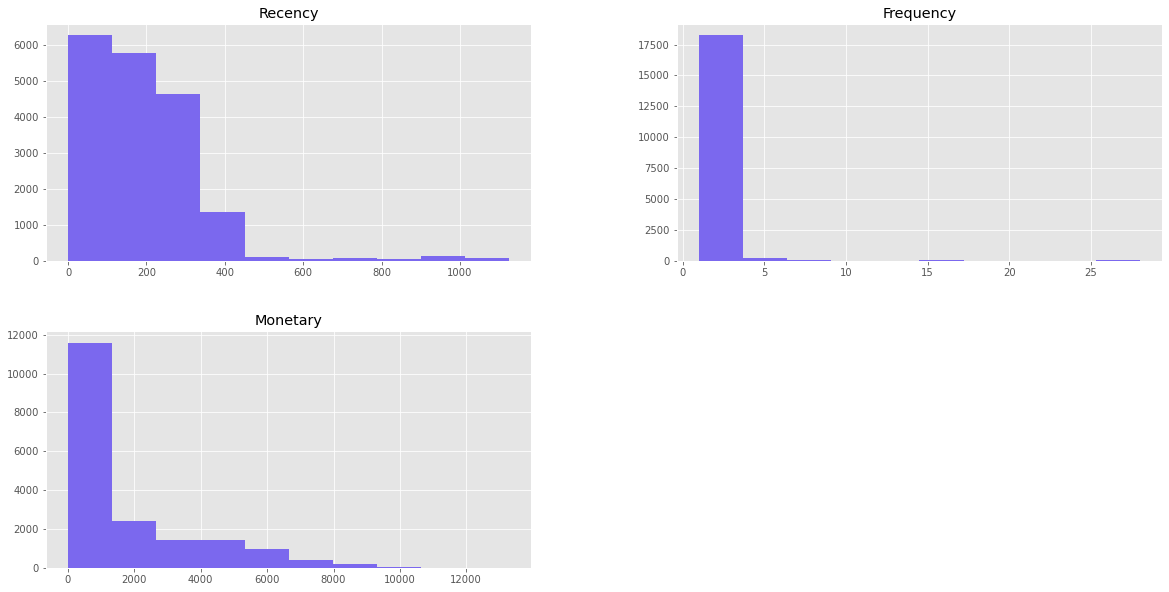

In [478]:
rfm.iloc[:,1:4].hist(figsize=(20,10), color = 'mediumslateblue')

In [479]:
rfm.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,18484.00,18484.00,18484.00
mean,189.33,1.50,1588.33
std,146.29,1.10,2124.23
min,0.00,1.00,2.29
25%,86.00,1.00,49.97
50%,168.00,1.00,270.26
75%,263.00,2.00,2511.28
max,1126.00,28.00,13295.38


In [480]:
# 4 is the optimal one.
#Based on business requirements, we can go ahead with less or more clusters. I have selected

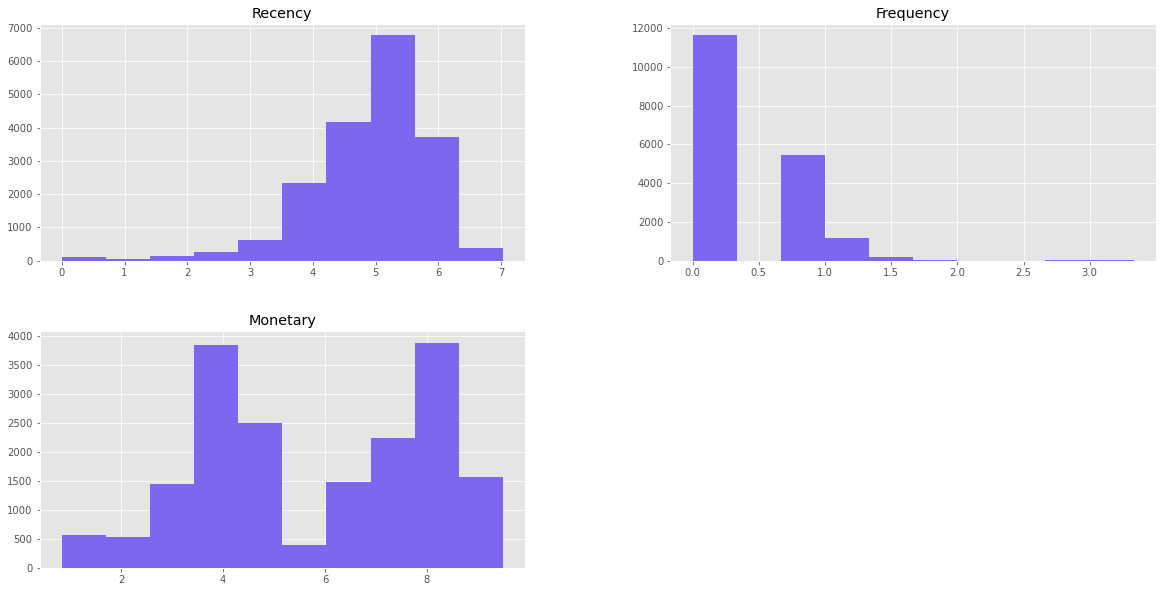

In [481]:
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x
    
# Apply the function to Recency column 
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
# Unskew the data
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

# PLot logged data
rfm_log.hist(figsize=(20,10), color = 'mediumslateblue')
pass

In [482]:
# Scale data
scaler = RobustScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
# Transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)

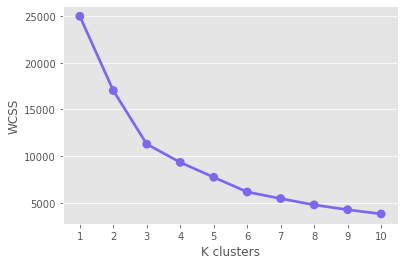

In [483]:
# Choose k number of clusters using the Elbow method
def elbow_plot (features):
    wcss = {}
    for k in range(1, 11):
        kmeans = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300)
        kmeans.fit(features)
        wcss[k] = kmeans.inertia_
        
    # Plot the WCSS values
    sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()), color = 'mediumslateblue')
    plt.xlabel('K clusters')
    plt.ylabel('WCSS')
    plt.show()

elbow_plot(rfm_scaled)




In [484]:
seed = 53
kmeans = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300, random_state = seed)
kmeans.fit(rfm_scaled)
# Assign the clusters to rfm dataframe
rfm['RFM_cluster'] = kmeans.labels_
rfm.head()

,CustomerKey,Recency,Frequency,Monetary,RFM_Segment,RFM_Score,RFM_status,RFM_cluster
0,11000,270.00,3,8248.99,411,6,Gold,0
1,11001,49.00,3,6383.88,111,3,Gold,0
2,11002,339.00,3,8114.04,411,6,Gold,0
3,11003,263.00,3,8139.29,311,5,Gold,0
4,11004,272.00,3,8196.01,411,6,Gold,0


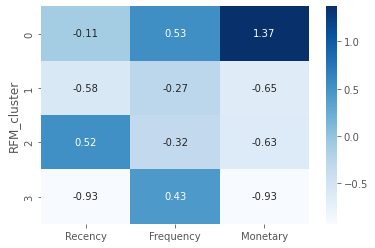

In [485]:
#visualise in heat map
#calculating mean value
total_avg= rfm.iloc[:,1:4]
total_avg = total_avg.mean()

cluster_avg_K = rfm.groupby('RFM_cluster').mean().iloc[:,1:4]
prop_rfm_K= cluster_avg_K/total_avg -1

#heatmap
sns.heatmap(prop_rfm_K,cmap='Blues',fmt ='.2f',annot =True)
plt.plot()
pass

In [486]:
# Alternative way to visualise 3D data: Snake plot
# Assign cluster column 
rfm_scaled['RFM_cluster'] = kmeans.labels_
rfm_scaled

# Melt the dataframe
rfm_melted = pd.melt(frame= rfm_scaled, 
                     id_vars= ['RFM_cluster'], 
                     var_name = 'Metrics', 
                     value_name = 'Scaled value')
rfm_melted.head()

,RFM_cluster,Metrics,Scaled value
0,0,Recency,0.42
1,0,Recency,-1.10
2,0,Recency,0.63
3,0,Recency,0.40
4,0,Recency,0.43


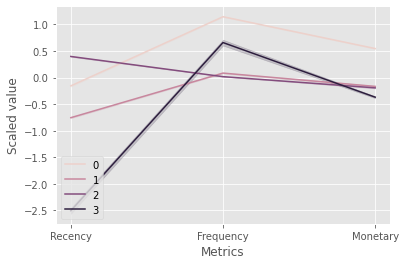

In [487]:
# PLot snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Scaled value', hue = 'RFM_cluster', data = rfm_melted)
plt.legend(loc = 'lower left')
pass

In [488]:
rfm.groupby('RFM_cluster')['Recency'].count()

RFM_cluster
0    5971
1    4189
2    7467
3     857
Name: Recency, dtype: int64

In [489]:
#Cluster 2 is the most valuable group of customers with highest mean frequency (purchase most often), least mean recency (has recently purchased from the company) and the highest mean monetary (high purchasing amount).
#On the other hand, Cluster 2 is the group of customers with least frequency and monetary and recency values.

## Comparing RFM analysis and Clusters

In [490]:
#Join rfm with transcational data

rfm_trans = pd.merge(order,rfm, on =['CustomerKey'])

rfm_trans.head()


,CustomerKey,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,...,Days Passed_median,Days Passed_min,Days Passed_max,Recency,Frequency,Monetary,RFM_Segment,RFM_Score,RFM_status,RFM_cluster
0,11000,8.00,2.67,2.00,1.00,5.00,8248.99,2749.66,2507.03,2341.97,...,417.50,105.00,730.00,270.00,3,8248.99,411,6,Gold,0
1,11001,11.00,3.67,4.00,1.00,6.00,6383.88,2127.96,2419.93,588.96,...,530.00,328.00,732.00,49.00,3,6383.88,111,3,Gold,0
2,11002,4.00,1.33,1.00,1.00,2.00,8114.04,2704.68,2419.06,2294.99,...,389.00,54.00,724.00,339.00,3,8114.04,411,6,Gold,0
3,11003,9.00,3.00,4.00,1.00,4.00,8139.29,2713.10,2420.34,2318.96,...,431.50,125.00,738.00,263.00,3,8139.29,311,5,Gold,0
4,11004,6.00,2.00,2.00,1.00,3.00,8196.01,2732.00,2419.06,2376.96,...,414.50,99.00,730.00,272.00,3,8196.01,411,6,Gold,0


### Tenure and Churning

In [491]:
#filter relevant columns


tenure = df1[['CustomerKey','OrderDate']]
tenure = tenure.groupby('CustomerKey').agg({'OrderDate':['min','max']})
tenure.columns = ['_'.join(tenure) for tenure in tenure.columns.ravel()]
tenure.head()

,OrderDate_min,OrderDate_max
CustomerKey,,
11000,2011-01-19,2013-05-03
11001,2011-01-15,2013-12-10
11002,2011-01-07,2013-02-23
11003,2010-12-29,2013-05-10
11004,2011-01-23,2013-05-01


In [492]:
#calculate tenure
tenure['Tenure_Months']=tenure['OrderDate_max']- tenure['OrderDate_min']
tenure['Tenure_Months'] = tenure['Tenure_Months']/np.timedelta64(1,'M')
tenure.head()

,OrderDate_min,OrderDate_max,Tenure_Months
CustomerKey,,,
11000,2011-01-19,2013-05-03,27.43
11001,2011-01-15,2013-12-10,34.83
11002,2011-01-07,2013-02-23,25.56
11003,2010-12-29,2013-05-10,28.35
11004,2011-01-23,2013-05-01,27.24


In [493]:
#creating target variable:Churn or No churn?
#determine elapsed time thesold for churning
tenure['Tenure_Months'].describe()

count   18484.00
mean        5.17
std         8.51
min         0.00
25%         0.00
50%         0.00
75%         8.90
max        35.78
Name: Tenure_Months, dtype: float64

<AxesSubplot:>

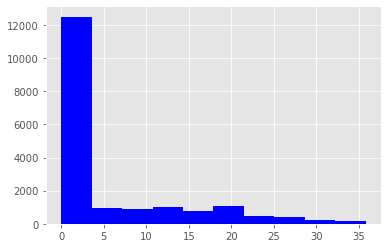

In [494]:
tenure['Tenure_Months'].hist(color ='blue')

In [495]:
tenure['Recency'] = (last_order - tenure['OrderDate_max']) / np.timedelta64(1,'D')
tenure.head()

,OrderDate_min,OrderDate_max,Tenure_Months,Recency
CustomerKey,,,,
11000,2011-01-19,2013-05-03,27.43,270.00
11001,2011-01-15,2013-12-10,34.83,49.00
11002,2011-01-07,2013-02-23,25.56,339.00
11003,2010-12-29,2013-05-10,28.35,263.00
11004,2011-01-23,2013-05-01,27.24,272.00


In [496]:
#determine churn days(8 months= 240 days)

def churn(x):
    if x >=240:
        return 1
    else:
        return 0
    
tenure['Churn'] = [churn(x) for x in tenure.Recency]
    


In [497]:
#remove columns
cols = ['OrderDate_max','OrderDate_min','Recency']
tenure.drop(cols,axis = 1,inplace = True)
tenure = tenure.reset_index()
tenure.head()

,CustomerKey,Tenure_Months,Churn
0,11000,27.43,1
1,11001,34.83,0
2,11002,25.56,1
3,11003,28.35,1
4,11004,27.24,1


In [498]:
#Join tenure with transcational data

rfm_trans = pd.merge(rfm_trans,tenure, on =['CustomerKey'])

rfm_trans.head()

,CustomerKey,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,...,Days Passed_max,Recency,Frequency,Monetary,RFM_Segment,RFM_Score,RFM_status,RFM_cluster,Tenure_Months,Churn
0,11000,8.00,2.67,2.00,1.00,5.00,8248.99,2749.66,2507.03,2341.97,...,730.00,270.00,3,8248.99,411,6,Gold,0,27.43,1
1,11001,11.00,3.67,4.00,1.00,6.00,6383.88,2127.96,2419.93,588.96,...,732.00,49.00,3,6383.88,111,3,Gold,0,34.83,0
2,11002,4.00,1.33,1.00,1.00,2.00,8114.04,2704.68,2419.06,2294.99,...,724.00,339.00,3,8114.04,411,6,Gold,0,25.56,1
3,11003,9.00,3.00,4.00,1.00,4.00,8139.29,2713.10,2420.34,2318.96,...,738.00,263.00,3,8139.29,311,5,Gold,0,28.35,1
4,11004,6.00,2.00,2.00,1.00,3.00,8196.01,2732.00,2419.06,2376.96,...,730.00,272.00,3,8196.01,411,6,Gold,0,27.24,1


## Demographic Data

In [499]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-QEC24C4;'
                      'Database=AdventureWorksDW2017;' 
                      'Trusted_Connection=yes;')


df2 = """SELECT [CustomerKey],[BirthDate],[MaritalStatus],[Gender],
                 [YearlyIncome],[TotalChildren] AS [Total_Children],
                 [NumberChildrenAtHome] AS [Children_at_Home],[EnglishOccupation],[EnglishEducation],
                 [HouseOwnerFlag] AS [House_Owned],[NumberCarsOwned],[CommuteDistance]

                 FROM [dbo].[DimCustomer] """

demographics = pd.read_sql(df2 , conn)


conn.close()
demographics.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,Total_Children,Children_at_Home,EnglishOccupation,EnglishEducation,House_Owned,NumberCarsOwned,CommuteDistance
0,11000,1971-10-06,M,M,90000.00,2,0,Professional,Bachelors,1,0,1-2 Miles
1,11001,1976-05-10,S,M,60000.00,3,3,Professional,Bachelors,0,1,0-1 Miles
2,11002,1971-02-09,M,M,60000.00,3,3,Professional,Bachelors,1,1,2-5 Miles
3,11003,1973-08-14,S,F,70000.00,0,0,Professional,Bachelors,0,1,5-10 Miles
4,11004,1979-08-05,S,F,80000.00,5,5,Professional,Bachelors,1,4,1-2 Miles


In [500]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerKey        18484 non-null  int64  
 1   BirthDate          18484 non-null  object 
 2   MaritalStatus      18484 non-null  object 
 3   Gender             18484 non-null  object 
 4   YearlyIncome       18484 non-null  float64
 5   Total_Children     18484 non-null  int64  
 6   Children_at_Home   18484 non-null  int64  
 7   EnglishOccupation  18484 non-null  object 
 8   EnglishEducation   18484 non-null  object 
 9   House_Owned        18484 non-null  object 
 10  NumberCarsOwned    18484 non-null  int64  
 11  CommuteDistance    18484 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.7+ MB


In [501]:
demographics.duplicated().sum() 

0

## Data Tranformation

In [502]:
#calculating Age
def age(BirthDate):
    return last_order - BirthDate
demographics['BirthDate'] = pd.to_datetime(demographics['BirthDate'])
#Apply Age function and convert days to years
demographics['age'] = demographics['BirthDate'].apply(age)/np.timedelta64(1,'Y')
demographics.head()


,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,Total_Children,Children_at_Home,EnglishOccupation,EnglishEducation,House_Owned,NumberCarsOwned,CommuteDistance,age
0,11000,1971-10-06,M,M,90000.00,2,0,Professional,Bachelors,1,0,1-2 Miles,42.31
1,11001,1976-05-10,S,M,60000.00,3,3,Professional,Bachelors,0,1,0-1 Miles,37.72
2,11002,1971-02-09,M,M,60000.00,3,3,Professional,Bachelors,1,1,2-5 Miles,42.97
3,11003,1973-08-14,S,F,70000.00,0,0,Professional,Bachelors,0,1,5-10 Miles,40.46
4,11004,1979-08-05,S,F,80000.00,5,5,Professional,Bachelors,1,4,1-2 Miles,34.48


<AxesSubplot:>

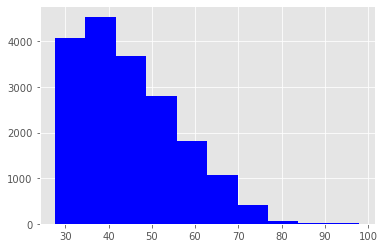

In [503]:
demographics['age'].hist(color ='blue')

In [504]:
#create age brackets
bins = [0, 30, 40, 60, np.inf]
agebracket = ['20s', '30s','40-50s', '60s or older']
demographics['Age Bracket'] = pd.cut(demographics['age'],bins,labels= agebracket)
demographics.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,Total_Children,Children_at_Home,EnglishOccupation,EnglishEducation,House_Owned,NumberCarsOwned,CommuteDistance,age,Age Bracket
0,11000,1971-10-06,M,M,90000.00,2,0,Professional,Bachelors,1,0,1-2 Miles,42.31,40-50s
1,11001,1976-05-10,S,M,60000.00,3,3,Professional,Bachelors,0,1,0-1 Miles,37.72,30s
2,11002,1971-02-09,M,M,60000.00,3,3,Professional,Bachelors,1,1,2-5 Miles,42.97,40-50s
3,11003,1973-08-14,S,F,70000.00,0,0,Professional,Bachelors,0,1,5-10 Miles,40.46,40-50s
4,11004,1979-08-05,S,F,80000.00,5,5,Professional,Bachelors,1,4,1-2 Miles,34.48,30s


<AxesSubplot:>

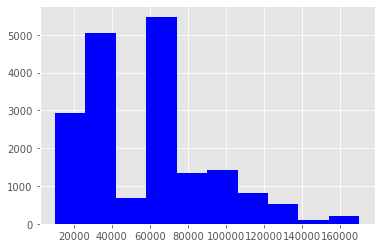

In [505]:
demographics['YearlyIncome'].hist(color ='blue')

In [506]:
#creating income brackets

bins = [0,12000,50000,145000,np.inf]
bracket = ['Low','Lower-Middle','Upper-Middle','High']
demographics['YearlyIncomeBracket'] = pd.cut(demographics['YearlyIncome'],bins,labels= bracket)
demographics.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,YearlyIncome,Total_Children,Children_at_Home,EnglishOccupation,EnglishEducation,House_Owned,NumberCarsOwned,CommuteDistance,age,Age Bracket,YearlyIncomeBracket
0,11000,1971-10-06,M,M,90000.00,2,0,Professional,Bachelors,1,0,1-2 Miles,42.31,40-50s,Upper-Middle
1,11001,1976-05-10,S,M,60000.00,3,3,Professional,Bachelors,0,1,0-1 Miles,37.72,30s,Upper-Middle
2,11002,1971-02-09,M,M,60000.00,3,3,Professional,Bachelors,1,1,2-5 Miles,42.97,40-50s,Upper-Middle
3,11003,1973-08-14,S,F,70000.00,0,0,Professional,Bachelors,0,1,5-10 Miles,40.46,40-50s,Upper-Middle
4,11004,1979-08-05,S,F,80000.00,5,5,Professional,Bachelors,1,4,1-2 Miles,34.48,30s,Upper-Middle


In [507]:
#join rfm with transcational data

rfm_trans = pd.merge(rfm_trans,demographics, on =['CustomerKey'])

rfm_trans.head()

,CustomerKey,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,...,Total_Children,Children_at_Home,EnglishOccupation,EnglishEducation,House_Owned,NumberCarsOwned,CommuteDistance,age,Age Bracket,YearlyIncomeBracket
0,11000,8.00,2.67,2.00,1.00,5.00,8248.99,2749.66,2507.03,2341.97,...,2,0,Professional,Bachelors,1,0,1-2 Miles,42.31,40-50s,Upper-Middle
1,11001,11.00,3.67,4.00,1.00,6.00,6383.88,2127.96,2419.93,588.96,...,3,3,Professional,Bachelors,0,1,0-1 Miles,37.72,30s,Upper-Middle
2,11002,4.00,1.33,1.00,1.00,2.00,8114.04,2704.68,2419.06,2294.99,...,3,3,Professional,Bachelors,1,1,2-5 Miles,42.97,40-50s,Upper-Middle
3,11003,9.00,3.00,4.00,1.00,4.00,8139.29,2713.10,2420.34,2318.96,...,0,0,Professional,Bachelors,0,1,5-10 Miles,40.46,40-50s,Upper-Middle
4,11004,6.00,2.00,2.00,1.00,3.00,8196.01,2732.00,2419.06,2376.96,...,5,5,Professional,Bachelors,1,4,1-2 Miles,34.48,30s,Upper-Middle


## Attitudinal Data

In [508]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-QEC24C4;'
                      'Database=AdventureWorksDW2017;' 
                      'Trusted_Connection=yes;')


df3 = """SELECT 
         FI.[CustomerKey],
         FI.[SalesOrderNumber],
         FI.[SalesOrderLineNumber],
         DS.SalesReasonName,DS.SalesReasonReasonType
         FROM [dbo].[FactInternetSales] AS FI
         LEFT JOIN [dbo].[FactInternetSalesReason] AS FIR
         ON FI.SalesOrderNumber = FIR.SalesOrderNumber
         LEFT JOIN [dbo].[DimSalesReason] AS DS
         ON DS.SalesReasonKey = FIR.SalesReasonKey """

attitude = pd.read_sql(df3 , conn)


conn.close()
attitude.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,SalesReasonName,SalesReasonReasonType
0,21768,SO43697,1,Manufacturer,Other
1,21768,SO43697,1,Quality,Other
2,27645,SO43702,1,Manufacturer,Other
3,27645,SO43702,1,Quality,Other
4,16624,SO43703,1,Manufacturer,Other


## Data Transformation

In [509]:
attitude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194586 entries, 0 to 194585
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   CustomerKey            194586 non-null  int64 
 1   SalesOrderNumber       194586 non-null  object
 2   SalesOrderLineNumber   194586 non-null  int64 
 3   SalesReasonName        188157 non-null  object
 4   SalesReasonReasonType  188157 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.4+ MB


In [510]:
attitude.duplicated().sum() #CHECKING DUPLICATE VALUES

123642

In [511]:
attitude.isnull().sum() #checking for missing values

CustomerKey                 0
SalesOrderNumber            0
SalesOrderLineNumber        0
SalesReasonName          6429
SalesReasonReasonType    6429
dtype: int64

In [512]:
#Removing duplicates

attitude.drop_duplicates(subset = None,keep = 'first',inplace = True)

In [513]:
#repalcing msiisng values

attitude = attitude.fillna(attitude.mode().iloc[0])
attitude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70944 entries, 0 to 194585
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerKey            70944 non-null  int64 
 1   SalesOrderNumber       70944 non-null  object
 2   SalesOrderLineNumber   70944 non-null  int64 
 3   SalesReasonName        70944 non-null  object
 4   SalesReasonReasonType  70944 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.2+ MB


In [514]:
attitude.isnull().sum()

CustomerKey              0
SalesOrderNumber         0
SalesOrderLineNumber     0
SalesReasonName          0
SalesReasonReasonType    0
dtype: int64

### Data Transformation

In [515]:
#apply hot encoding
cols =['SalesReasonReasonType','SalesReasonName']
attitude = pd.get_dummies(data = attitude,columns=cols)
attitude.head()

,CustomerKey,SalesOrderNumber,SalesOrderLineNumber,SalesReasonReasonType_Marketing,SalesReasonReasonType_Other,SalesReasonReasonType_Promotion,SalesReasonName_Manufacturer,SalesReasonName_On Promotion,SalesReasonName_Other,SalesReasonName_Price,SalesReasonName_Quality,SalesReasonName_Review,SalesReasonName_Television Advertisement
0,21768,SO43697,1,0,1,0,1,0,0,0,0,0,0
1,21768,SO43697,1,0,1,0,0,0,0,0,1,0,0
2,27645,SO43702,1,0,1,0,1,0,0,0,0,0,0
3,27645,SO43702,1,0,1,0,0,0,0,0,1,0,0
4,16624,SO43703,1,0,1,0,1,0,0,0,0,0,0


In [516]:
attitude.columns

Index(['CustomerKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'SalesReasonReasonType_Marketing', 'SalesReasonReasonType_Other',
       'SalesReasonReasonType_Promotion', 'SalesReasonName_Manufacturer',
       'SalesReasonName_On Promotion', 'SalesReasonName_Other',
       'SalesReasonName_Price', 'SalesReasonName_Quality',
       'SalesReasonName_Review', 'SalesReasonName_Television  Advertisement'],
      dtype='object')

In [517]:
#renaming column before aggregation

attitude.rename(columns={'SalesReasonName_Television  Advertisement' :
                          'SalesReasonName_Television_Advertisement'},inplace =True)

In [518]:
#agrregating data

attitude = attitude.groupby('CustomerKey').agg({'SalesReasonReasonType_Marketing':'max', 
                                                'SalesReasonReasonType_Other':'max',
                                                'SalesReasonReasonType_Promotion':'max',
                                                 'SalesReasonName_Manufacturer':'max',
                                                 'SalesReasonName_On Promotion':'max', 
                                                 'SalesReasonName_Other':'max',
                                                 'SalesReasonName_Price':'max',
                                                 'SalesReasonName_Quality':'max',
                                                 'SalesReasonName_Review':'max',
                                                'SalesReasonName_Television_Advertisement':'max'}).reset_index()
attitude.head()

,CustomerKey,SalesReasonReasonType_Marketing,SalesReasonReasonType_Other,SalesReasonReasonType_Promotion,SalesReasonName_Manufacturer,SalesReasonName_On Promotion,SalesReasonName_Other,SalesReasonName_Price,SalesReasonName_Quality,SalesReasonName_Review,SalesReasonName_Television_Advertisement
0,11000,0,1,1,0,1,0,1,0,0,0
1,11001,0,1,0,0,0,0,1,0,0,0
2,11002,0,1,1,0,1,0,1,0,0,0
3,11003,0,1,0,0,0,0,1,0,0,0
4,11004,0,1,0,0,0,0,1,0,0,0


In [519]:
#join attitudinal data with transcational and demographics data

rfm_trans = pd.merge(rfm_trans,attitude, on =['CustomerKey'])

rfm_trans.head().transpose()

,0,1,2,3,4
CustomerKey,11000,11001,11002,11003,11004
OrderQuantity_sum,8.00,11.00,4.00,9.00,6.00
OrderQuantity_mean,2.67,3.67,1.33,3.00,2.00
OrderQuantity_median,2.00,4.00,1.00,4.00,2.00
OrderQuantity_min,1.00,1.00,1.00,1.00,1.00
OrderQuantity_max,5.00,6.00,2.00,4.00,3.00
Total Sales_sum,8248.99,6383.88,8114.04,8139.29,8196.01
Total Sales_mean,2749.66,2127.96,2704.68,2713.10,2732.00
Total Sales_median,2507.03,2419.93,2419.06,2420.34,2419.06
Total Sales_min,2341.97,588.96,2294.99,2318.96,2376.96


### EDA for combined data
#### Hold out sample

<AxesSubplot:xlabel='Churn', ylabel='count'>

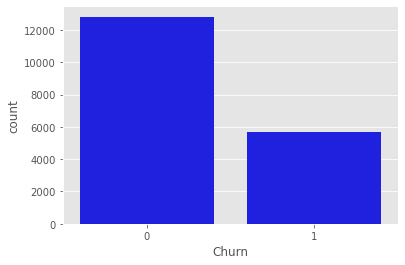

In [520]:
sns.countplot(data =rfm_trans,x = 'Churn',color ='blue')

In [521]:
rfm_trans['Churn'].value_counts()

0    12817
1     5667
Name: Churn, dtype: int64

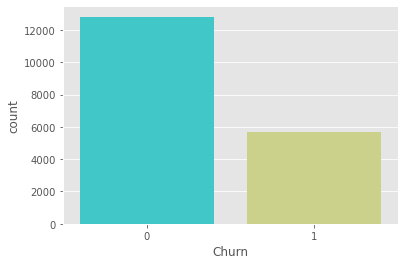

<Figure size 432x288 with 0 Axes>

In [522]:
sns.countplot(x='Churn',data=rfm_trans,palette='rainbow')
plt.show()
plt.savefig('count_plot')

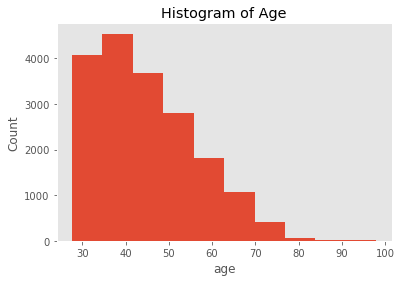

In [523]:
rfm_trans.age.hist()
plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('Count')
plt.grid(False)
plt.savefig('hist_Age')

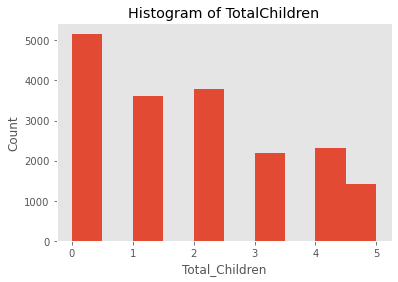

In [524]:
rfm_trans.Total_Children.hist()
plt.title('Histogram of TotalChildren')
plt.xlabel('Total_Children')
plt.ylabel('Count')
plt.grid(False)
plt.savefig('hist_TotalChildren')

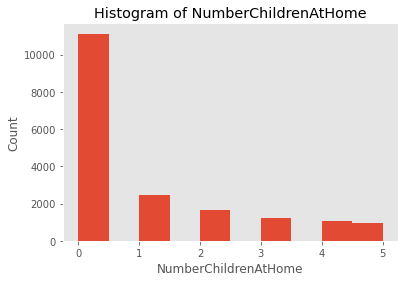

In [525]:
rfm_trans.Children_at_Home.hist()
plt.title('Histogram of NumberChildrenAtHome')
plt.xlabel('NumberChildrenAtHome')
plt.ylabel('Count')
plt.grid(False)
plt.savefig('hist_NumberChildrenAtHome')

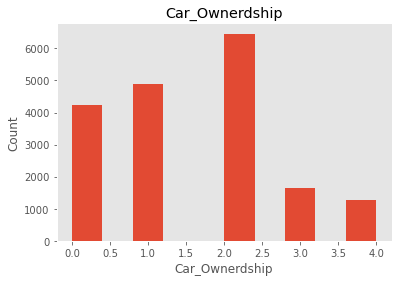

In [526]:
rfm_trans.NumberCarsOwned.hist()
plt.title('Car_Ownerdship')
plt.xlabel('Car_Ownerdship')
plt.ylabel('Count')
plt.grid(False)
plt.savefig('hist_Car_Ownerdhip')

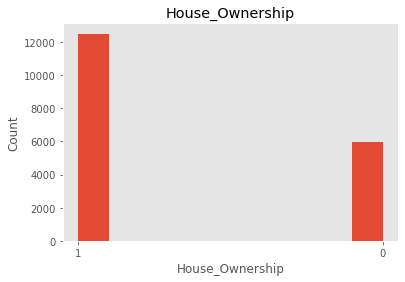

In [527]:
rfm_trans.House_Owned.hist()
plt.title('House_Ownership')
plt.xlabel('House_Ownership')
plt.ylabel('Count')
plt.grid(False)
plt.savefig('hist_House_Ownership')

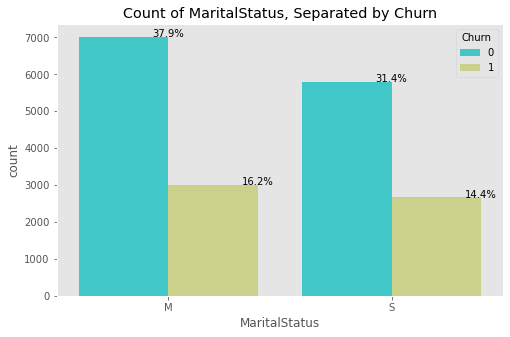

In [528]:
plt.figure(figsize=(8,5))
total = float(len(rfm_trans))
ax = sns.countplot(x='MaritalStatus',data=rfm_trans, palette='rainbow',hue='Churn')
plt.grid(False)
plt.title("Count of MaritalStatus, Separated by Churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

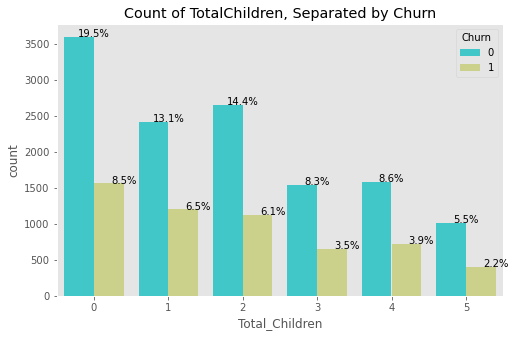

In [529]:
plt.figure(figsize=(8,5))
total = float(len(rfm_trans))
ax = sns.countplot(x='Total_Children',data=rfm_trans, palette='rainbow',hue='Churn')
plt.grid(False)
plt.title("Count of TotalChildren, Separated by Churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

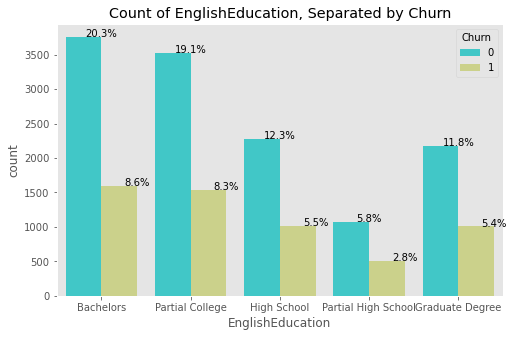

In [530]:
plt.figure(figsize=(8,5))
total = float(len(rfm_trans))
ax = sns.countplot(x='EnglishEducation',data=rfm_trans, palette='rainbow',hue='Churn')
plt.grid(False)
plt.title("Count of EnglishEducation, Separated by Churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

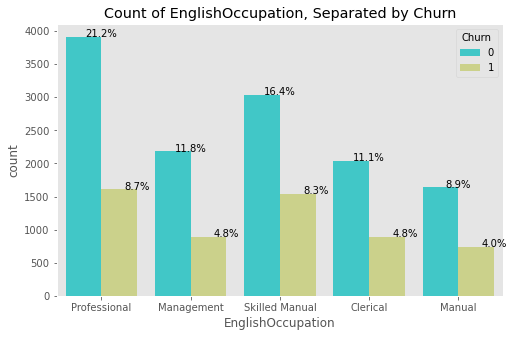

In [531]:
plt.figure(figsize=(8,5))
total = float(len(rfm_trans))
ax = sns.countplot(x='EnglishOccupation',data=rfm_trans, palette='rainbow',hue='Churn')
plt.grid(False)
plt.title("Count of EnglishOccupation, Separated by Churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

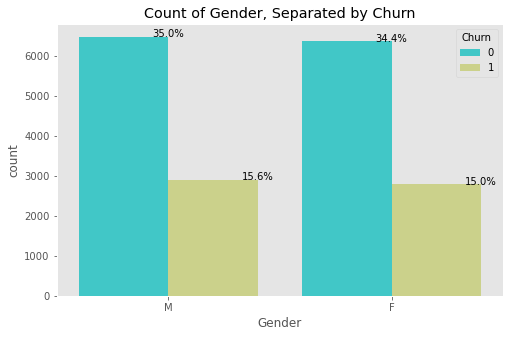

In [532]:
plt.figure(figsize=(8,5))
total = float(len(rfm_trans))
ax = sns.countplot(x='Gender',data=rfm_trans, palette='rainbow',hue='Churn')
plt.grid(False)
plt.title("Count of Gender, Separated by Churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

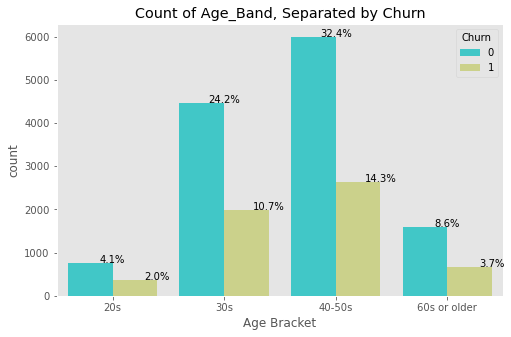

In [533]:
plt.figure(figsize=(8,5))
total = float(len(rfm_trans))
ax = sns.countplot(x='Age Bracket',data=rfm_trans, palette='rainbow',hue='Churn')
plt.grid(False)
plt.title("Count of Age_Band, Separated by Churn")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [534]:
#split non churners

non_churners =rfm_trans[rfm_trans['Churn']==0]
non_churners.head()

,CustomerKey,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,...,SalesReasonReasonType_Marketing,SalesReasonReasonType_Other,SalesReasonReasonType_Promotion,SalesReasonName_Manufacturer,SalesReasonName_On Promotion,SalesReasonName_Other,SalesReasonName_Price,SalesReasonName_Quality,SalesReasonName_Review,SalesReasonName_Television_Advertisement
1,11001,11.00,3.67,4.00,1.00,6.00,6383.88,2127.96,2419.93,588.96,...,0,1,0,0,0,0,1,0,0,0
12,11012,5.00,2.50,2.50,2.00,3.00,81.26,40.63,40.63,6.28,...,0,1,0,0,0,0,1,0,0,0
13,11013,5.00,2.50,2.50,2.00,3.00,113.96,56.98,56.98,38.98,...,0,1,0,0,0,0,1,0,0,0
17,11017,4.00,1.33,1.00,1.00,2.00,6434.31,2144.77,2316.97,742.35,...,0,1,1,0,1,0,1,0,0,0
18,11018,7.00,2.33,2.00,1.00,4.00,6533.28,2177.76,2341.97,791.32,...,0,1,1,0,1,0,1,0,0,0


In [535]:
seed = 53
modeldata,scoredata = train_test_split(non_churners,test_size=0.5,random_state = seed)


In [536]:
len(modeldata)

6408

In [537]:
#split churners

churners =rfm_trans[rfm_trans['Churn']==1]
churners.head()

,CustomerKey,OrderQuantity_sum,OrderQuantity_mean,OrderQuantity_median,OrderQuantity_min,OrderQuantity_max,Total Sales_sum,Total Sales_mean,Total Sales_median,Total Sales_min,...,SalesReasonReasonType_Marketing,SalesReasonReasonType_Other,SalesReasonReasonType_Promotion,SalesReasonName_Manufacturer,SalesReasonName_On Promotion,SalesReasonName_Other,SalesReasonName_Price,SalesReasonName_Quality,SalesReasonName_Review,SalesReasonName_Television_Advertisement
0,11000,8.00,2.67,2.00,1.00,5.00,8248.99,2749.66,2507.03,2341.97,...,0,1,1,0,1,0,1,0,0,0
2,11002,4.00,1.33,1.00,1.00,2.00,8114.04,2704.68,2419.06,2294.99,...,0,1,1,0,1,0,1,0,0,0
3,11003,9.00,3.00,4.00,1.00,4.00,8139.29,2713.10,2420.34,2318.96,...,0,1,0,0,0,0,1,0,0,0
4,11004,6.00,2.00,2.00,1.00,3.00,8196.01,2732.00,2419.06,2376.96,...,0,1,0,0,0,0,1,0,0,0
5,11005,6.00,2.00,1.00,1.00,4.00,8121.33,2707.11,2384.07,2362.27,...,0,1,0,1,0,0,1,0,0,0


In [538]:
modeldata = pd.concat([modeldata,churners],ignore_index= True)

In [539]:
modeldata.shape

(12075, 54)

In [540]:
modeldata.head().transpose()

,0,1,2,3,4
CustomerKey,14242,12378,14382,18129,24967
OrderQuantity_sum,4.00,2.00,5.00,3.00,1.00
OrderQuantity_mean,2.00,1.00,2.50,3.00,1.00
OrderQuantity_median,2.00,1.00,2.50,3.00,1.00
OrderQuantity_min,1.00,1.00,1.00,3.00,1.00
OrderQuantity_max,3.00,1.00,4.00,3.00,1.00
Total Sales_sum,3351.40,4366.41,3373.91,96.46,4.99
Total Sales_mean,1675.70,2183.20,1686.95,96.46,4.99
Total Sales_median,1675.70,2183.20,1686.95,96.46,4.99
Total Sales_min,1000.44,2071.42,1000.44,96.46,4.99


In [541]:
# double check for missing values and duplicates

modeldata.isnull().sum()[modeldata.isnull().sum()!=0]

Days Passed_mean      7972
Days Passed_median    7972
Days Passed_min       7972
Days Passed_max       7972
dtype: int64

In [542]:
# This are dropped in later in categorica data

In [543]:
print('Number of duplicates:',modeldata.duplicated().sum())

Number of duplicates: 0


## Categorical Data

In [544]:
cols=modeldata.columns
cols

Index(['CustomerKey', 'OrderQuantity_sum', 'OrderQuantity_mean',
       'OrderQuantity_median', 'OrderQuantity_min', 'OrderQuantity_max',
       'Total Sales_sum', 'Total Sales_mean', 'Total Sales_median',
       'Total Sales_min', 'Total Sales_max', 'Profit_sum', 'Profit_mean',
       'Profit_median', 'Profit_min', 'Profit_max', 'Days Passed_sum',
       'Days Passed_mean', 'Days Passed_median', 'Days Passed_min',
       'Days Passed_max', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment',
       'RFM_Score', 'RFM_status', 'RFM_cluster', 'Tenure_Months', 'Churn',
       'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'Total_Children', 'Children_at_Home', 'EnglishOccupation',
       'EnglishEducation', 'House_Owned', 'NumberCarsOwned', 'CommuteDistance',
       'age', 'Age Bracket', 'YearlyIncomeBracket',
       'SalesReasonReasonType_Marketing', 'SalesReasonReasonType_Other',
       'SalesReasonReasonType_Promotion', 'SalesReasonName_Manufacturer',
       'SalesReasonNa

In [545]:
todrop = ['CustomerKey','OrderQuantity_min','Total Sales_sum','BirthDate','Days Passed_sum',
       'Days Passed_mean', 'Days Passed_median', 'Days Passed_min',
       'Days Passed_max']
select_data = modeldata.drop(todrop,axis =1)

In [546]:
cat = ['RFM_Score','RFM_status' , 'RFM_Segment','RFM_cluster',
       'MaritalStatus', 'Gender', 'Total_Children',
       'Children_at_Home', 'EnglishOccupation','EnglishEducation','House_Owned',
       'NumberCarsOwned', 'CommuteDistance', 'Age Bracket','YearlyIncomeBracket',
       'SalesReasonReasonType_Marketing', 'SalesReasonReasonType_Other',
       'SalesReasonReasonType_Promotion', 'SalesReasonName_Manufacturer',
        'SalesReasonName_Other','SalesReasonName_On Promotion',
       'SalesReasonName_Price', 'SalesReasonName_Quality',
       'SalesReasonName_Review', 'SalesReasonName_Television_Advertisement']
#cat = ['RFM_Segment', 'RFM_Score', 'cluster_no', 'Marital_Status', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
      #'EnglishEducation', 'EnglishOccupation', 'House_Ownership', 'Car_Ownerdhip', 'CommuteDistance', 'Age_Band',
      #'Income_Group', 'SalesReasonReasonType_Marketing', 'SalesReasonReasonType_Other', 'SalesReasonReasonType_Promotion',
      #'SalesReason_Manufacturer', 'SalesReason_On Promotion', 'SalesReason_Other', 'SalesReason_Price',
      #'SalesReason_Quality', 'SalesReason_Review', 'SalesReason_Television_Advertisement']#

In [547]:
# Get distribution /Frequency per category
for var in cat:
 print(select_data[var].value_counts())

10    2141
9     1837
7     1604
11    1598
12    1242
8     1150
6     1043
5      779
4      517
3      164
Name: RFM_Score, dtype: int64
Silver    4591
Nickel    2840
Gold      2503
Bronze    2141
Name: RFM_status, dtype: int64
444    1242
442    1118
443     870
421     810
344     728
342     575
321     571
244     522
144     516
343     484
142     465
242     460
221     432
143     348
243     348
121     328
441     281
123     258
111     164
223     159
323     154
211     154
311     139
422     137
222     109
122      99
113      97
322      97
423      88
213      51
411      43
124      40
224      37
112      35
324      29
313      25
424      17
212      12
413       8
312       7
241       7
341       6
141       2
114       2
214       1
Name: RFM_Segment, dtype: int64
2    5881
0    3600
1    2136
3     458
Name: RFM_cluster, dtype: int64
M    6504
S    5571
Name: MaritalStatus, dtype: int64
M    6097
F    5978
Name: Gender, dtype: int64
0    3341
2    2467
1   

C:\Users\Laptop\AppData\Local\Temp/ipykernel_10004/2105493441.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


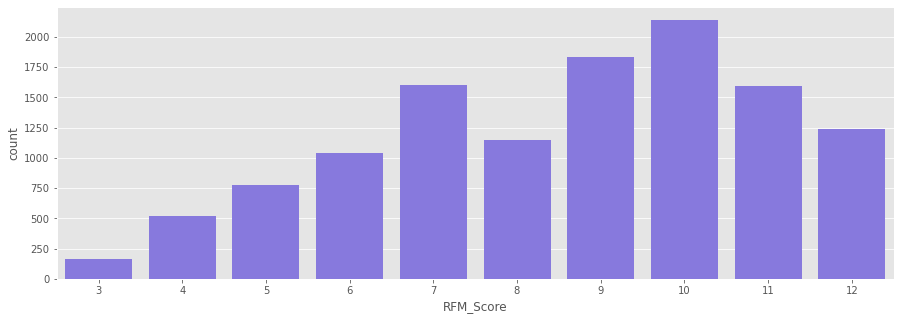

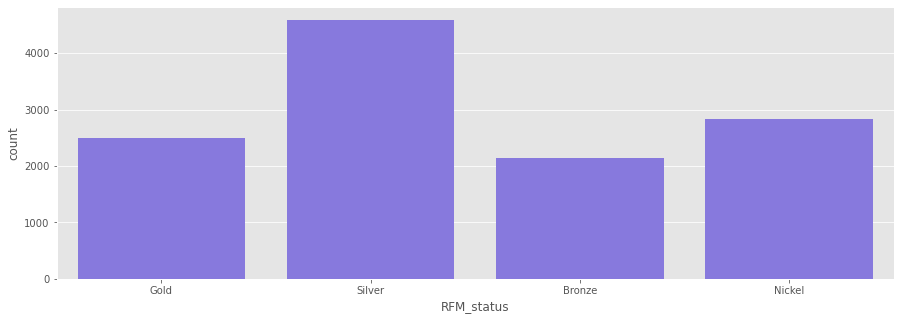

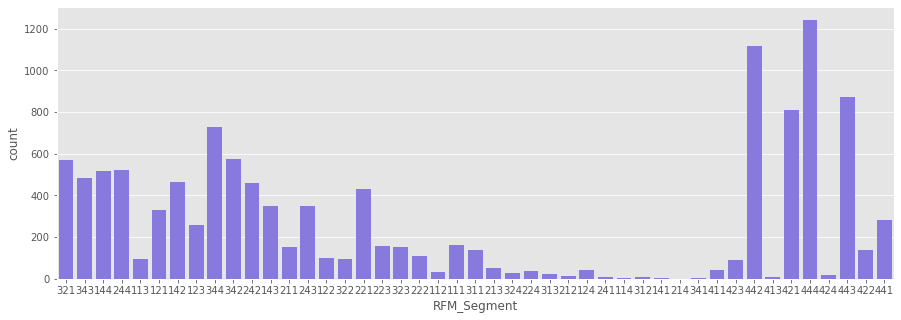

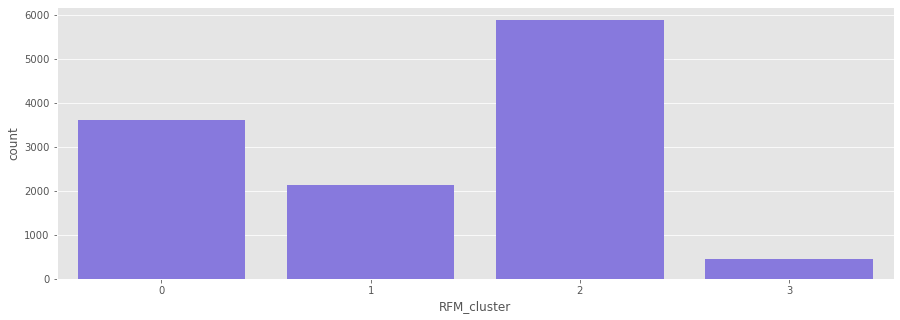

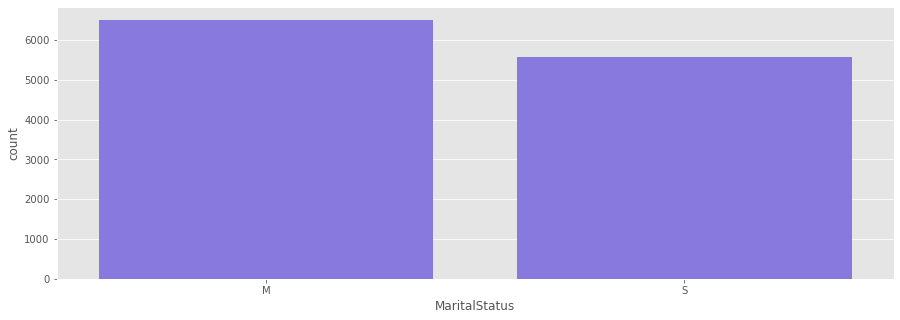

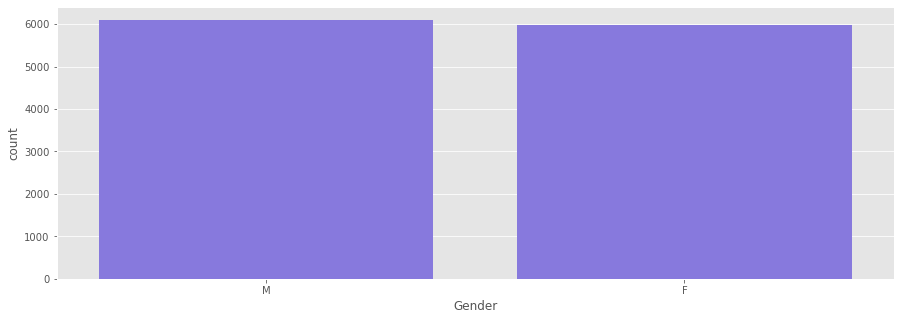

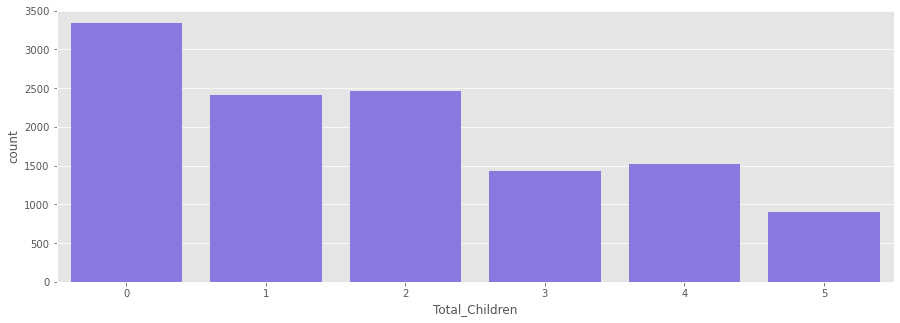

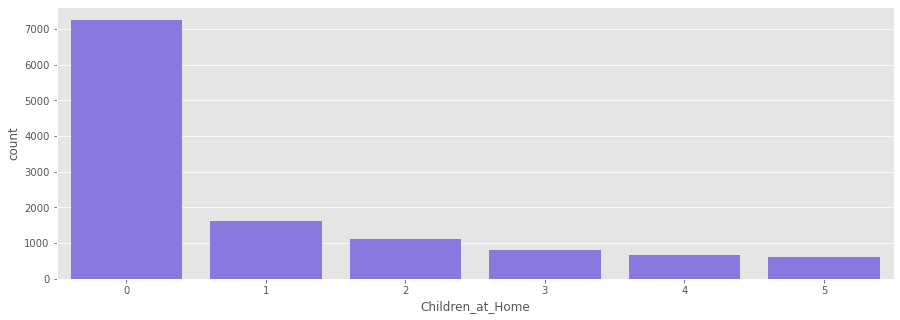

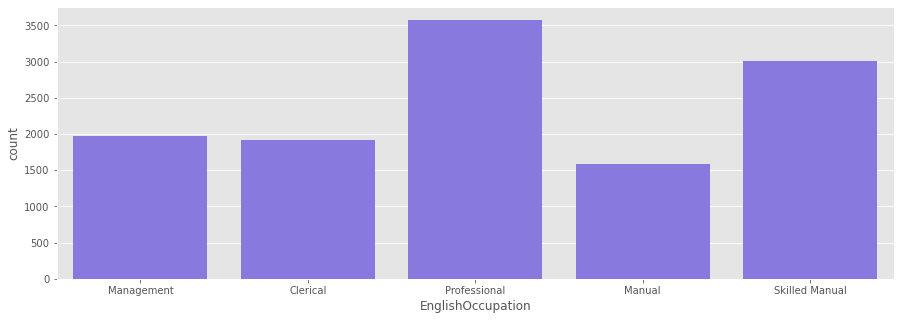

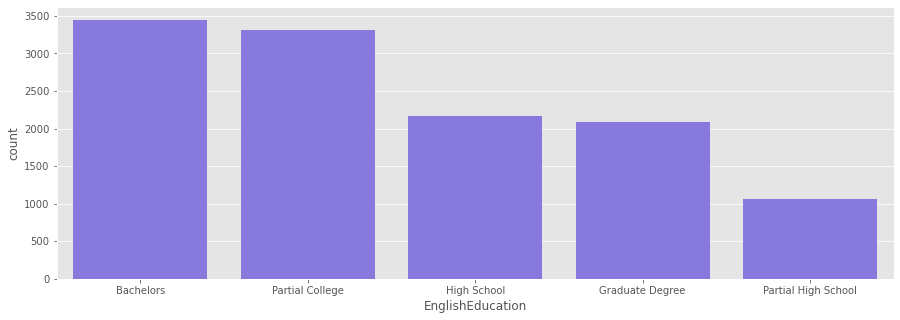

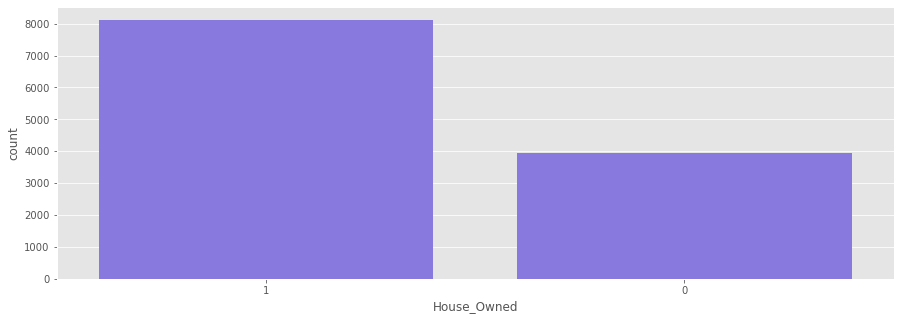

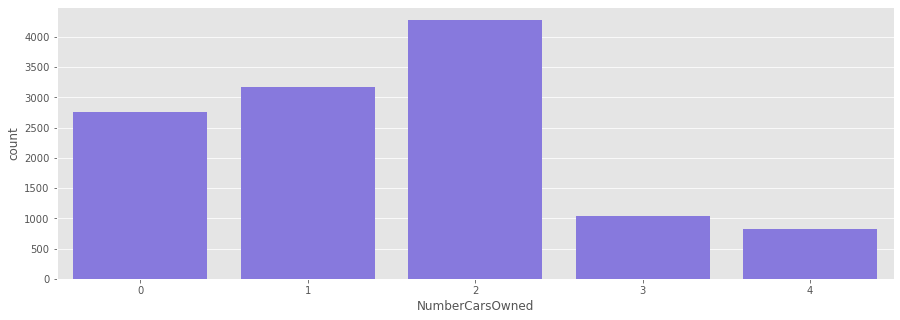

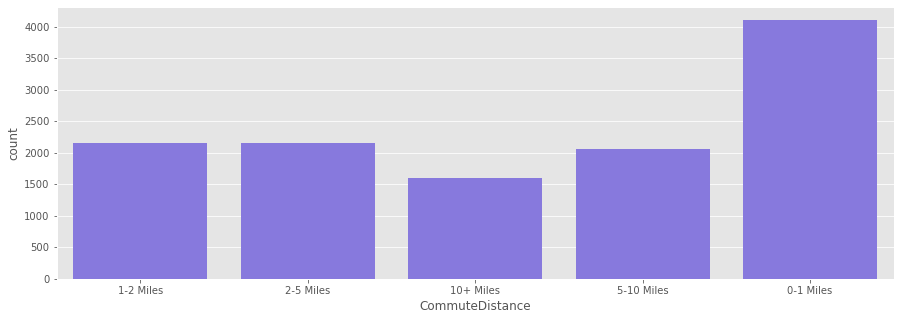

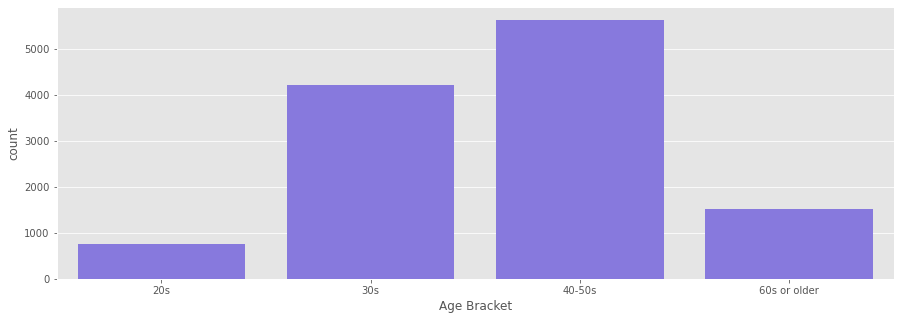

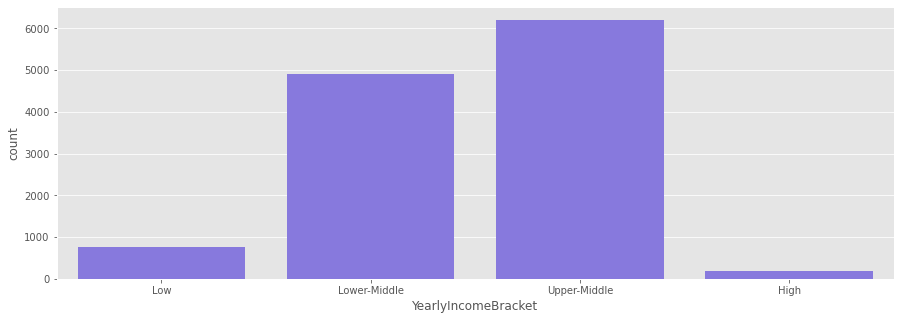

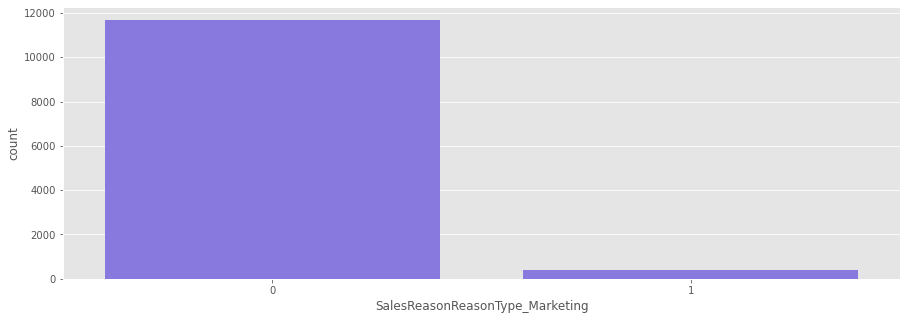

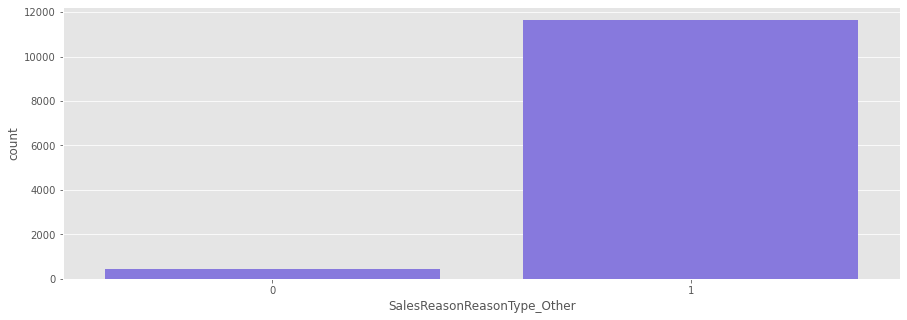

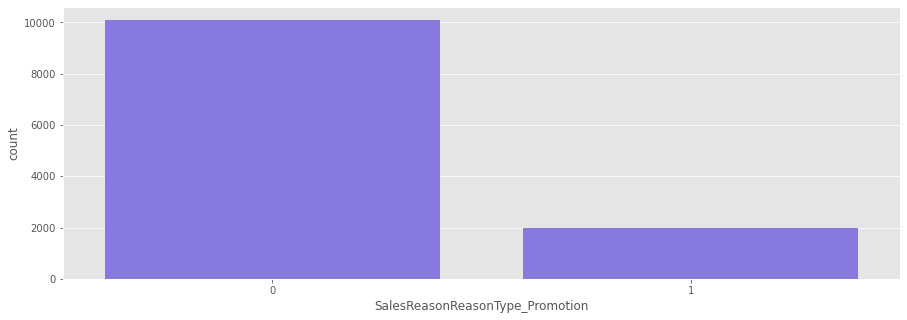

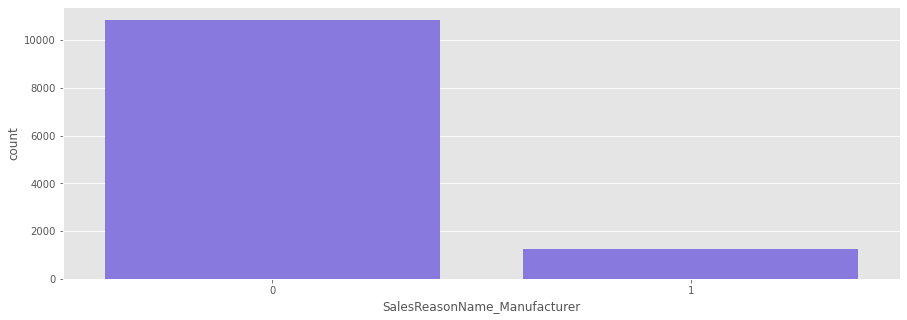

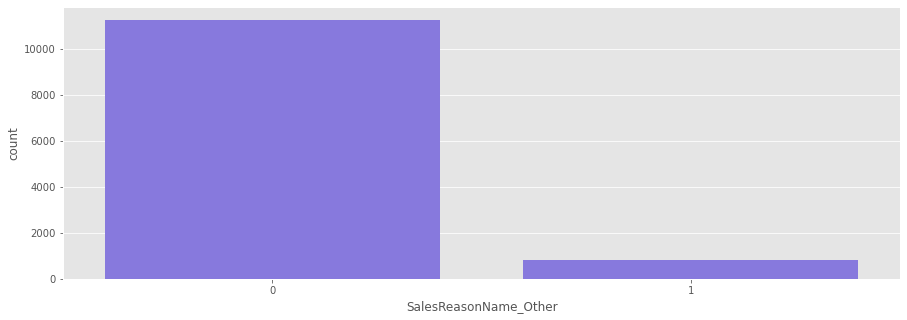

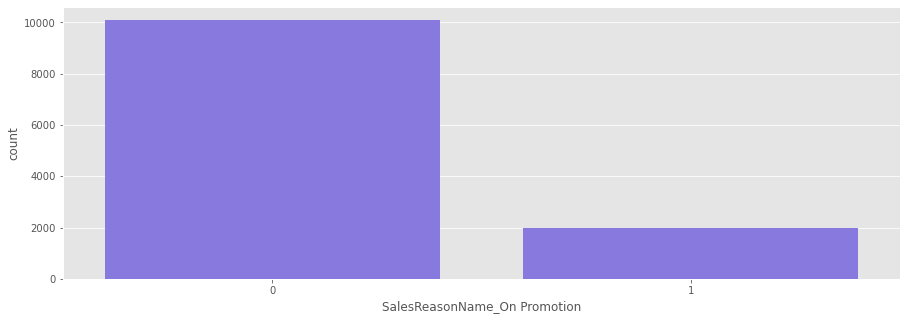

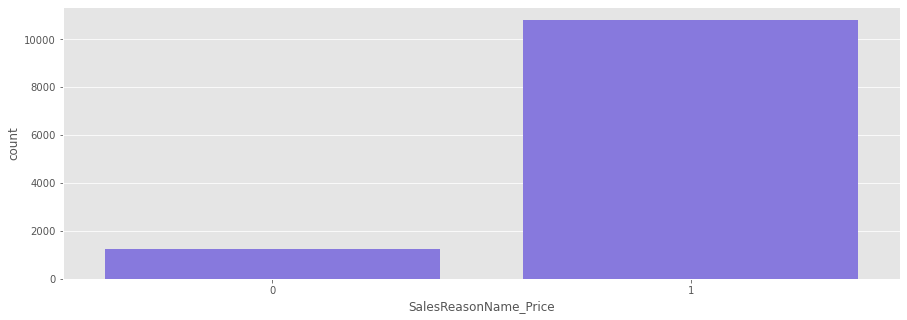

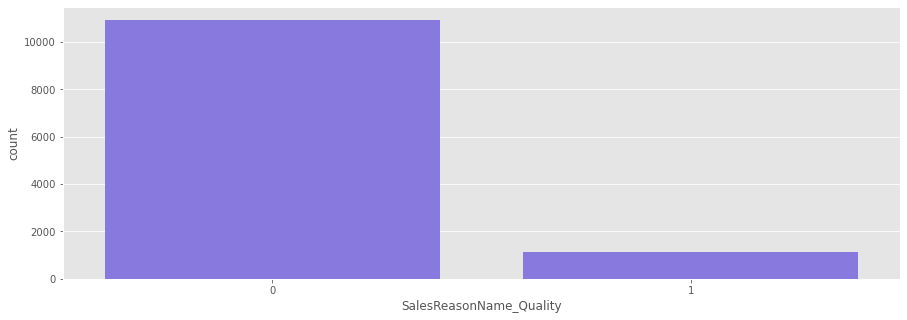

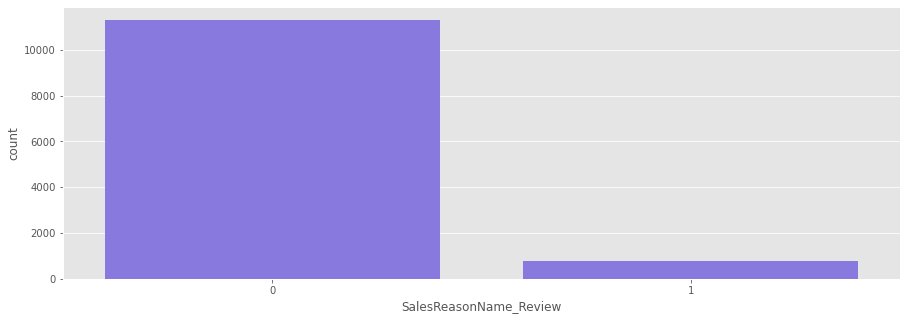

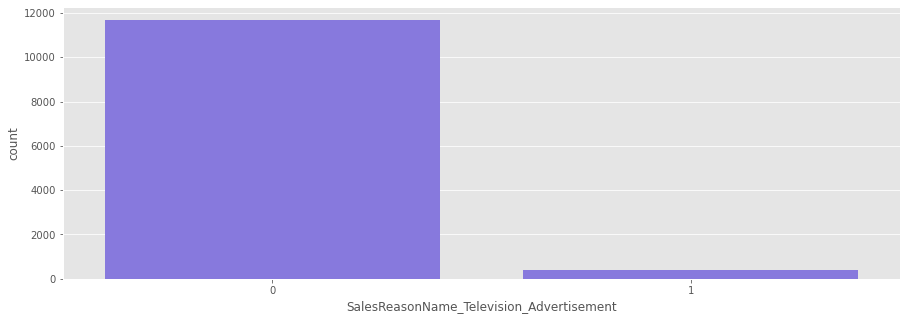

In [548]:
# plot distribution /frequency per category
cat_df = select_data[cat]
plt.rcParams['figure.figsize'] = (15,5) # chart sizes

for i, col in enumerate(cat_df.columns):
   plt.figure(i)
   sns.countplot(x=col, data=cat_df, color = 'mediumslateblue')

In [549]:
dummies = ['RFM_Score','RFM_status' , 'RFM_Segment','RFM_cluster',
       'MaritalStatus', 'Gender', 'Total_Children',
       'Children_at_Home', 'EnglishOccupation','EnglishEducation','House_Owned',
       'NumberCarsOwned', 'CommuteDistance', 'Age Bracket','YearlyIncomeBracket']

#dummies = ['RFM_Segment', 'RFM_Score', 'cluster_no', 'Marital_Status', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
          #'EnglishEducation', 'EnglishOccupation', 'House_Ownership', 'Car_Ownerdhip', 'CommuteDistance',
          #'Age_Band', 'Income_Group']

encoded_data = pd.get_dummies(select_data, columns = [v for v in dummies], drop_first = True)

In [550]:
# Get frequency of target variable
encoded_data['Churn'].value_counts()

0    6408
1    5667
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

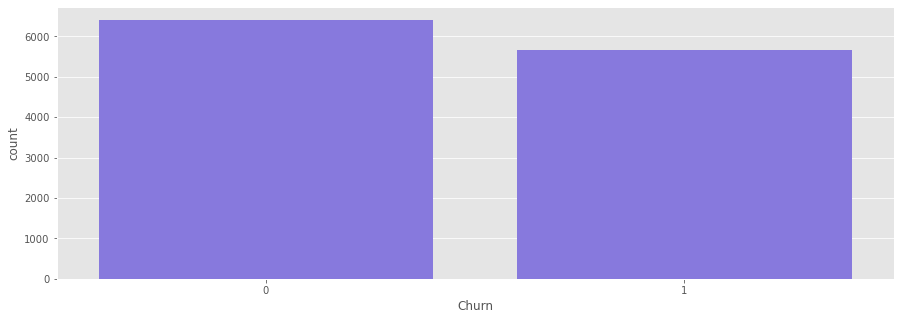

In [551]:
sns.countplot(x = encoded_data['Churn'],color = 'mediumslateblue')

In [552]:
# filter continous data
cont = [v for v in cols if v not in cat and v not in todrop and v != 'Churn']

In [553]:
encoded_data[cont].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OrderQuantity_sum,12075.00,3.12,2.33,1.00,2.00,3.00,4.00,68.00
OrderQuantity_mean,12075.00,2.22,0.94,1.00,1.50,2.00,3.00,8.00
OrderQuantity_median,12075.00,2.22,0.95,1.00,1.50,2.00,3.00,8.00
OrderQuantity_max,12075.00,2.52,1.10,1.00,2.00,2.00,3.00,8.00
Total Sales_mean,12075.00,931.55,1065.61,2.29,39.98,178.98,1878.30,3578.27
Total Sales_median,12075.00,930.78,1065.02,2.29,39.98,178.98,1958.77,3578.27
Total Sales_min,12075.00,789.20,954.85,2.29,37.93,178.98,1249.84,3578.27
Total Sales_max,12075.00,1075.14,1251.28,2.29,42.28,187.98,2319.99,3578.27
Profit_sum,12075.00,635.91,847.24,1.43,25.03,168.59,1058.52,5254.60
Profit_mean,12075.00,379.69,430.16,1.43,24.40,107.68,755.23,1487.84


array([[<AxesSubplot:title={'center':'OrderQuantity_sum'}>,
        <AxesSubplot:title={'center':'OrderQuantity_mean'}>,
        <AxesSubplot:title={'center':'OrderQuantity_median'}>,
        <AxesSubplot:title={'center':'OrderQuantity_max'}>],
       [<AxesSubplot:title={'center':'Total Sales_mean'}>,
        <AxesSubplot:title={'center':'Total Sales_median'}>,
        <AxesSubplot:title={'center':'Total Sales_min'}>,
        <AxesSubplot:title={'center':'Total Sales_max'}>],
       [<AxesSubplot:title={'center':'Profit_sum'}>,
        <AxesSubplot:title={'center':'Profit_mean'}>,
        <AxesSubplot:title={'center':'Profit_median'}>,
        <AxesSubplot:title={'center':'Profit_min'}>],
       [<AxesSubplot:title={'center':'Profit_max'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Monetary'}>],
       [<AxesSubplot:title={'center':'Tenure_Months'}>,
        <AxesSubplot:title={'center':'

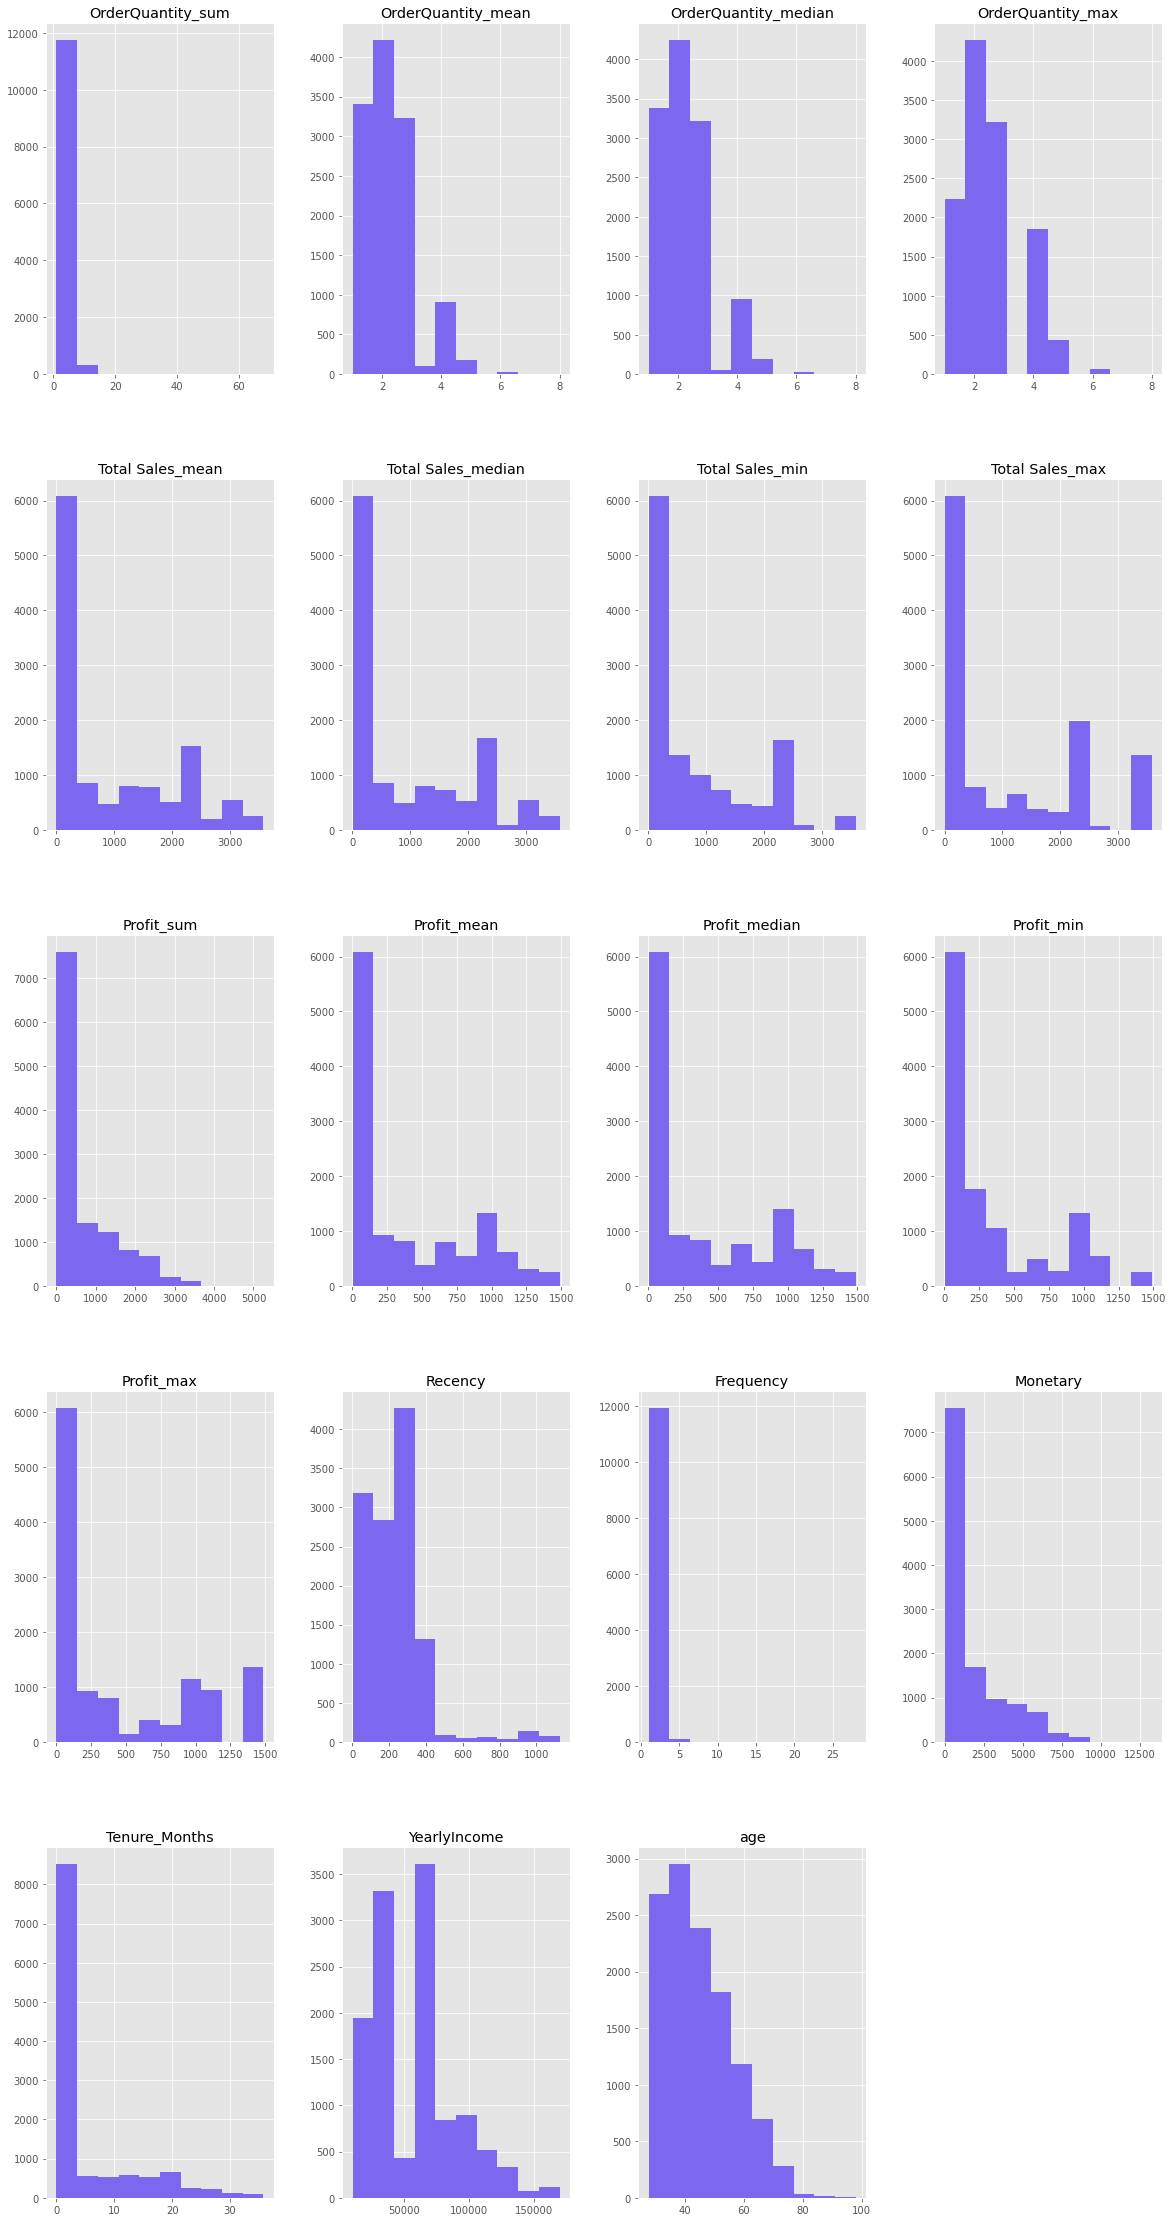

In [554]:
#plot histogram
encoded_data[cont].hist(figsize=(20,40), color = 'mediumslateblue')

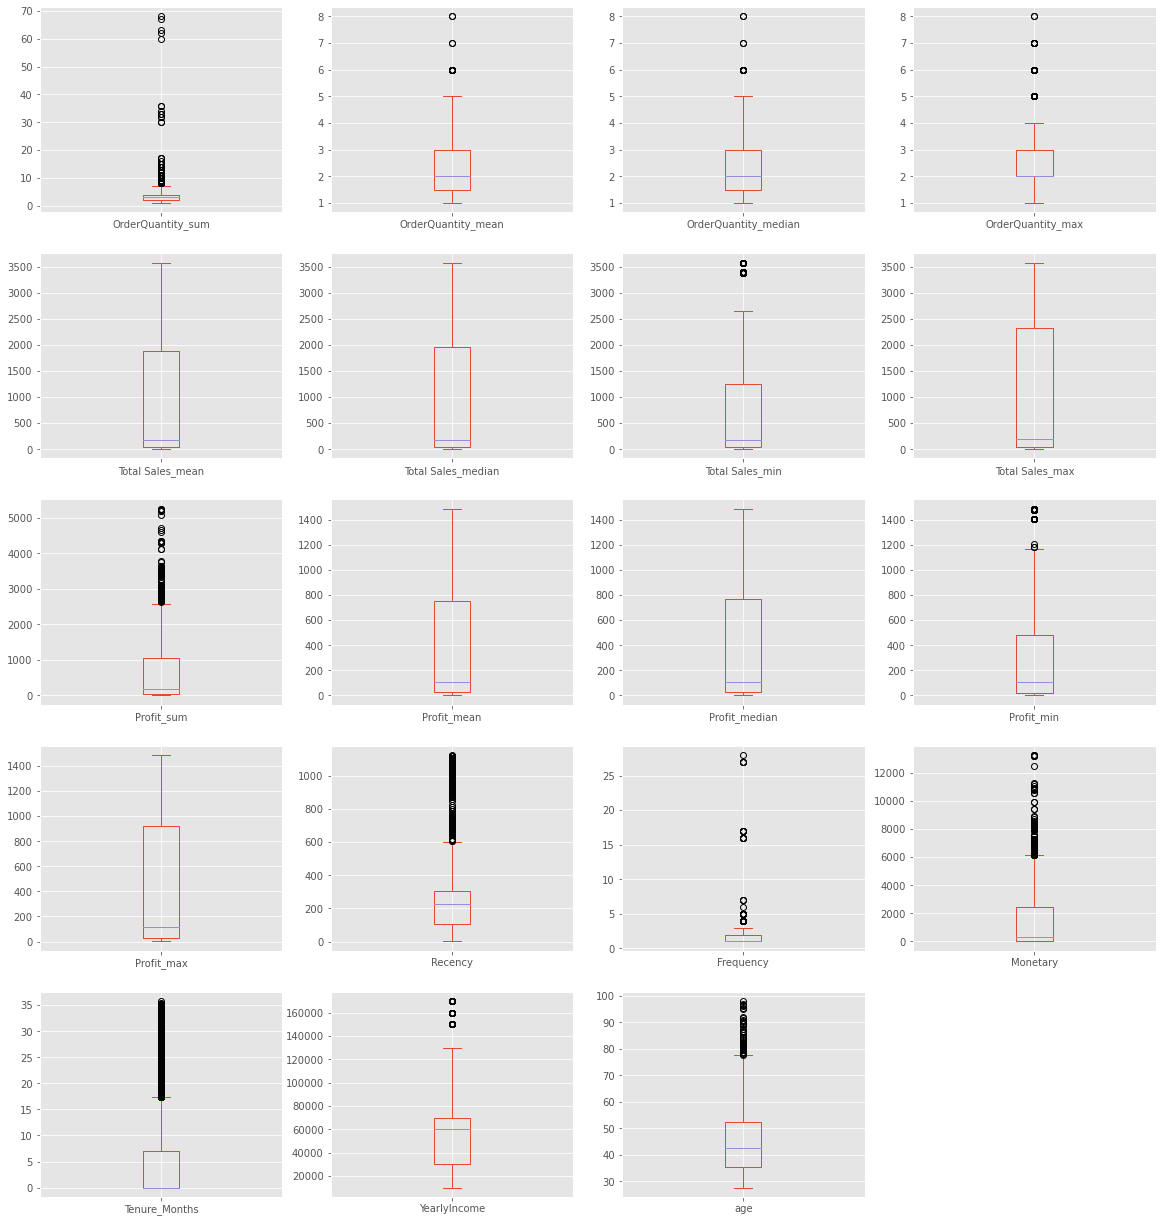

In [555]:
# Plot boxplots
encoded_data[cont].plot(kind='box', subplots=True, figsize=(20,40),
                      layout=(9,4), sharex=False, sharey=False)
plt.show()

## Feature Selection

Split X and Y

In [556]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Columns: 124 entries, OrderQuantity_sum to YearlyIncomeBracket_High
dtypes: float64(18), int64(2), uint8(104)
memory usage: 3.0 MB


In [557]:
list(encoded_data.columns)

['OrderQuantity_sum',
 'OrderQuantity_mean',
 'OrderQuantity_median',
 'OrderQuantity_max',
 'Total Sales_mean',
 'Total Sales_median',
 'Total Sales_min',
 'Total Sales_max',
 'Profit_sum',
 'Profit_mean',
 'Profit_median',
 'Profit_min',
 'Profit_max',
 'Recency',
 'Frequency',
 'Monetary',
 'Tenure_Months',
 'Churn',
 'YearlyIncome',
 'age',
 'SalesReasonReasonType_Marketing',
 'SalesReasonReasonType_Other',
 'SalesReasonReasonType_Promotion',
 'SalesReasonName_Manufacturer',
 'SalesReasonName_On Promotion',
 'SalesReasonName_Other',
 'SalesReasonName_Price',
 'SalesReasonName_Quality',
 'SalesReasonName_Review',
 'SalesReasonName_Television_Advertisement',
 'RFM_Score_4',
 'RFM_Score_5',
 'RFM_Score_6',
 'RFM_Score_7',
 'RFM_Score_8',
 'RFM_Score_9',
 'RFM_Score_10',
 'RFM_Score_11',
 'RFM_Score_12',
 'RFM_status_Silver',
 'RFM_status_Bronze',
 'RFM_status_Nickel',
 'RFM_Segment_112',
 'RFM_Segment_113',
 'RFM_Segment_114',
 'RFM_Segment_121',
 'RFM_Segment_122',
 'RFM_Segment_123'

In [558]:
# split the dataset into features and target variables
X = encoded_data.loc[:, encoded_data.columns != 'Churn']
y = encoded_data['Churn']

In [559]:
from xverse.transformer import WOE

In [560]:
#initiate weight of evidence
info_value = WOE()
#fit data
info_value.fit(X,y)

C:\Users\Laptop\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


WOE(mono_custom_binning={'Age Bracket_30s': array([0., 1.]),
                         'Age Bracket_40-50s': array([0., 1.]),
                         'Age Bracket_60s or older': array([0., 1.]),
                         'Children_at_Home_1': array([0., 1.]),
                         'Children_at_Home_2': array([0., 1.]),
                         'Children_at_Home_3': array([0., 1.]),
                         'Children_at_Home_4': array([0., 1.]),
                         'Children_at_Home_5': array([0., 1.]),
                         'CommuteDistance_1-2 Miles': array([0., 1....
              'NumberCarsOwned_2': {0: 0.0031345694712999455,
                                    1: -0.005704234462352845},
              'NumberCarsOwned_3': {0: 0.010985220172695103,
                                    1: -0.117647961447503},
              'NumberCarsOwned_4': {0: 0.01580093197653061,
                                    1: -0.21901629403984393},
              'OrderQuantity_max': {Interval(0.999, 2.0, closed='right'): 0.16904937434173828,
                                    Interval(2.0, 3.0, closed='right'): -0.14795109254365107,
                                    Interval(3.0, 8.0, closed='right'): -0.2705762195448253}, ...})

In [561]:
info_value.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,OrderQuantity_sum,"(0.999, 2.0]",5272,2885,2387,0.55,0.45,0.51,0.37,0.31,0.10
1,OrderQuantity_sum,"(2.0, 3.0]",3026,1389,1637,0.46,0.54,0.25,0.26,-0.04,0.10
2,OrderQuantity_sum,"(3.0, 68.0]",3777,1393,2384,0.37,0.63,0.25,0.37,-0.41,0.10
3,OrderQuantity_mean,"(0.999, 2.0]",7467,3688,3779,0.49,0.51,0.65,0.59,0.10,0.03
4,OrderQuantity_mean,"(2.0, 2.5]",962,320,642,0.33,0.67,0.06,0.10,-0.57,0.03
5,OrderQuantity_mean,"(2.5, 8.0]",3646,1659,1987,0.46,0.54,0.29,0.31,-0.06,0.03
6,OrderQuantity_median,"(0.999, 2.0]",7630,3708,3922,0.49,0.51,0.65,0.61,0.07,0.01
7,OrderQuantity_median,"(2.0, 2.5]",807,303,504,0.38,0.62,0.05,0.08,-0.39,0.01
8,OrderQuantity_median,"(2.5, 8.0]",3638,1656,1982,0.46,0.54,0.29,0.31,-0.06,0.01
9,OrderQuantity_max,"(0.999, 2.0]",6500,3325,3175,0.51,0.49,0.59,0.50,0.17,0.04


In [331]:
info_value.iv_df

,Variable_Name,Information_Value
92,RFM_cluster_2,1.22
95,RFM_status_Nickel,0.80
42,RFM_Score_5,0.32
45,RFM_Score_8,0.18
39,RFM_Score_11,0.16
...,...,...
82,RFM_Segment_413,0.00
66,RFM_Segment_241,0.00
49,RFM_Segment_114,0.00
54,RFM_Segment_141,0.00


In [562]:
# Rename variable 
iv_df = info_value.iv_df
iv_df.rename(columns={"Variable_Name":"index"}, inplace = True)
iv_df

,index,Information_Value
92,RFM_cluster_2,1.22
95,RFM_status_Nickel,0.80
42,RFM_Score_5,0.32
45,RFM_Score_8,0.18
39,RFM_Score_11,0.16
...,...,...
82,RFM_Segment_413,0.00
66,RFM_Segment_241,0.00
49,RFM_Segment_114,0.00
54,RFM_Segment_141,0.00


#### Random Forest

In [563]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state = seed)
# Fit data
rf.fit(X,y)
# Produce predictions
preds = rf.predict(X)
# Calculate accuracy
accuracy = accuracy_score(preds,y)
print(accuracy)

1.0


In [564]:
# Create a dataframe with variable importance scores
rf_df = pd.DataFrame(rf.feature_importances_, columns = ["RF"], index = X.columns)
rf_df = rf_df.reset_index()
rf_df.sort_values(['RF'], ascending=0)

,index,RF
13,Recency,0.42
86,RFM_cluster_2,0.06
85,RFM_cluster_1,0.05
40,RFM_status_Nickel,0.04
82,RFM_Segment_442,0.03
...,...,...
41,RFM_Segment_112,0.00
53,RFM_Segment_212,0.00
48,RFM_Segment_141,0.00
43,RFM_Segment_114,0.00


### Extra Trees

In [565]:
etc = ExtraTreesClassifier(random_state = seed)
etc.fit(X, y)
etc_df = pd.DataFrame(etc.feature_importances_, columns = ["Extra_trees"], index = X.columns)
etc_df = etc_df.reset_index()
etc_df.sort_values(['Extra_trees'], ascending=0)

,index,Extra_trees
13,Recency,0.17
86,RFM_cluster_2,0.08
82,RFM_Segment_442,0.05
77,RFM_Segment_421,0.05
85,RFM_cluster_1,0.05
...,...,...
65,RFM_Segment_312,0.00
53,RFM_Segment_212,0.00
55,RFM_Segment_214,0.00
48,RFM_Segment_141,0.00


### Chi Square

In [566]:
kbest = SelectKBest(score_func=chi2, k=5)
chi_sq = kbest.fit(X, y)
pd.options.display.float_format = '{:.2f}'.format
chi_sq_df = pd.DataFrame(chi_sq.scores_, columns = ["Chi_square"], index = X.columns)
chi_sq_df = chi_sq_df.reset_index()
chi_sq_df.sort_values('Chi_square', ascending=0)

,index,Chi_square
13,Recency,691911.00
17,YearlyIncome,348666.54
6,Total Sales_min,115063.21
5,Total Sales_median,79755.85
4,Total Sales_mean,76573.83
...,...,...
93,Total_Children_4,0.10
110,NumberCarsOwned_2,0.03
105,EnglishEducation_High School,0.02
118,Age Bracket_40-50s,0.01


### L1

In [567]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
l1 = SelectFromModel(lsvc,prefit=True)
l1_df = pd.DataFrame(l1.get_support(), columns = ["L1"], index = X.columns)
l1_df = l1_df.reset_index()
l1_df[l1_df['L1'] == True]

C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,index,L1
1,OrderQuantity_mean,True
4,Total Sales_mean,True
5,Total Sales_median,True
6,Total Sales_min,True
7,Total Sales_max,True
8,Profit_sum,True
9,Profit_mean,True
10,Profit_median,True
11,Profit_min,True
12,Profit_max,True


### Feature voting

In [568]:
# Combine altogether
dfs = [iv_df, rf_df, etc_df, chi_sq_df, l1_df]
summary = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
summary.head()

,index,Information_Value,RF,Extra_trees,Chi_square,L1
0,RFM_cluster_2,1.22,0.06,0.08,1691.33,False
1,RFM_status_Nickel,0.80,0.04,0.04,1582.95,False
2,RFM_Score_5,0.32,0.01,0.01,549.78,False
3,RFM_Score_8,0.18,0.00,0.01,407.69,False
4,RFM_Score_11,0.16,0.01,0.01,400.07,False


In [569]:
# Calculate scores
# Filter columns with non-binary values
columns = ['Information_Value', 'RF', 'Extra_trees', 'Chi_square']

score_table = pd.DataFrame({},[])
score_table['index'] = summary['index']

# Assign 1 if the score is in the top 5, else 0
for i in columns:
    score_table[i] = summary['index'].isin(list(summary.nlargest(5,i)['index'])).astype(int)

# Convert True to 1 and False to 0
#score_table['RFE'] = summary['RFE'].astype(int)
score_table['L1'] = summary['L1'].astype(int)

In [570]:
score_table['Final_score'] = score_table.sum(axis=1)
score_table.sort_values('Final_score',ascending=0)

,index,Information_Value,RF,Extra_trees,Chi_square,L1,Final_score
28,Recency,0,1,1,1,1,4
0,RFM_cluster_2,1,1,1,0,0,3
42,Total Sales_median,0,0,0,1,1,2
1,RFM_status_Nickel,1,1,0,0,0,2
52,Total Sales_mean,0,0,0,1,1,2
...,...,...,...,...,...,...,...
48,RFM_cluster_3,0,0,0,0,0,0
47,RFM_Segment_242,0,0,0,0,0,0
45,RFM_Segment_142,0,0,0,0,0,0
44,RFM_Segment_323,0,0,0,0,0,0


### Multicollinearity check

In [571]:
# Filter variables with score >= 2
select_var = X[list(score_table[score_table['Final_score'] >= 2]['index'])] 

In [572]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

vif = calculate_vif(select_var)
vif

,Features,VIF
0,RFM_cluster_2,5.39
1,RFM_status_Nickel,2.82
2,RFM_cluster_1,1.08
3,RFM_Segment_442,1.61
4,Total Sales_min,24.05
5,Recency,5.75
6,Total Sales_median,651.30
7,Total Sales_mean,695.34


In [573]:
# Narrow down the features until their VIF is equal to or lower than 5
while vif['VIF'][vif['VIF'] > 5].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    select_var.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(select_var)

vif

,Features,VIF
0,RFM_cluster_2,3.38
1,RFM_status_Nickel,2.62
2,RFM_cluster_1,1.04
3,RFM_Segment_442,1.60
4,Total Sales_median,1.28


In [574]:
final_features = vif['Features']

In [575]:
# Create the final dataframe with all selected features and label
final_var = list(vif['Features']) + ['Churn']
final_df = encoded_data[final_var]
final_df.head()

,RFM_cluster_2,RFM_status_Nickel,RFM_cluster_1,RFM_Segment_442,Total Sales_median,Churn
0,0,0,0,0,1675.70,0
1,0,0,0,0,2183.20,0
2,0,0,0,0,1686.95,0
3,1,0,0,0,96.46,0
4,0,0,1,0,4.99,0


In [576]:
# Final check for correlation between variables
corr = final_df.corr()
corr

,RFM_cluster_2,RFM_status_Nickel,RFM_cluster_1,RFM_Segment_442,Total Sales_median,Churn
RFM_cluster_2,1.00,0.57,-0.45,0.33,-0.26,0.52
RFM_status_Nickel,0.57,1.00,-0.26,-0.18,-0.46,0.41
RFM_cluster_1,-0.45,-0.26,1.00,-0.15,-0.15,-0.44
RFM_Segment_442,0.33,-0.18,-0.15,1.00,0.18,0.34
Total Sales_median,-0.26,-0.46,-0.15,0.18,1.00,0.07
Churn,0.52,0.41,-0.44,0.34,0.07,1.00


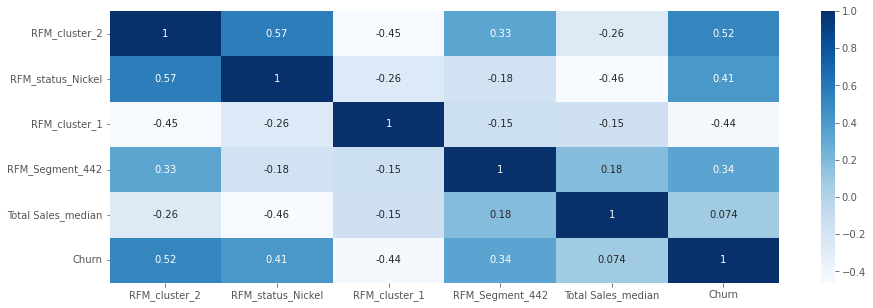

In [577]:
# Plot heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=plt.cm.Blues)
pass

### Model Selection

#### Train/Test Data Split

In [578]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_df, test_size = 0.3)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

X_train = train[list(vif['Features'])]
y_train = train['Churn']
X_test = test[list(vif['Features'])]
y_test = test['Churn']

In [579]:
# #sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

# #sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
#pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [580]:
# Fitting Logistic Regression to the Training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Predicting the Test set results
y_pred = logreg.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression      0.81       0.84    0.75      0.79      0.76


### Naive Byes

In [581]:
# Fitting Naive Byes to the Training set:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gnb.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression      0.81       0.84    0.75      0.79      0.76
1           Naive Byes      0.77       0.74    0.77      0.75      0.76


### Decision Trees

In [582]:
# Fitting Decision Tree to the Training set:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = tree.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression      0.81       0.84    0.75      0.79      0.76
2        Decision Tree      0.82       0.81    0.82      0.81      0.82
1           Naive Byes      0.77       0.74    0.77      0.75      0.76


### Extra Trees

In [583]:
# Fitting Decision Tree to the Training set:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = etc.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Extra Trees', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Logistic Regression      0.81       0.84    0.75      0.79      0.76
1        Decision Tree      0.82       0.81    0.82      0.81      0.82
3          Extra Trees      0.82       0.80    0.82      0.81      0.82
2           Naive Byes      0.77       0.74    0.77      0.75      0.76


### Neural Network

In [584]:
# Fitting Decision Tree to the Training set:
mlp =  MLPClassifier()
mlp.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = mlp.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Neural Network', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
4       Neural Network      0.81       0.87    0.69      0.77      0.72
0  Logistic Regression      0.81       0.84    0.75      0.79      0.76
1        Decision Tree      0.82       0.81    0.82      0.81      0.82
2          Extra Trees      0.82       0.80    0.82      0.81      0.82
3           Naive Byes      0.77       0.74    0.77      0.75      0.76


### Gradient Boosting

In [585]:
# Fitting Decision Tree to the Training set:
gb =  GradientBoostingClassifier()
gb.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = gb.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Gradient Boosting', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
5    Gradient Boosting      0.83       0.87    0.74      0.80      0.76
0       Neural Network      0.81       0.87    0.69      0.77      0.72
1  Logistic Regression      0.81       0.84    0.75      0.79      0.76
2        Decision Tree      0.82       0.81    0.82      0.81      0.82
3          Extra Trees      0.82       0.80    0.82      0.81      0.82
4           Naive Byes      0.77       0.74    0.77      0.75      0.76


### Random Forest

In [586]:
# Fitting Random Forest to the Training set:
    
rf = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = rf.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix 
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)


                 Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0    Gradient Boosting      0.83       0.87    0.74      0.80      0.76
1       Neural Network      0.81       0.87    0.69      0.77      0.72
2  Logistic Regression      0.81       0.84    0.75      0.79      0.76
3        Decision Tree      0.82       0.81    0.82      0.81      0.82
4          Extra Trees      0.82       0.80    0.82      0.81      0.82
6        Random Forest      0.82       0.79    0.83      0.81      0.82
5           Naive Byes      0.77       0.74    0.77      0.75      0.76


 ##### Gradient Boosting is the prefered model having the best accuracy,Prescision & F1 Score

### Chosen model (GB)is fit into the training dataset and the result is evaluated.

 ##### Gradient Boosting is the prefered model having the best accuracy

In [587]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
# Predict the Test set results
y_pred = gb.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Gradient Boosting',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

               Model  Accuracy  Precision  Recall  F1 Score  F2 Score
0  Gradient Boosting      0.83       0.87    0.74      0.80      0.76


## Hyperparameter tuning
In random search, you specify a grid of hyperparameters, and random combinations are selected where each combination of hyperparameters has an equal chance of being sampled. We do not analyze all combinations of hyperparameters, but only random samples of those combinations. This approach is much more computationally efficient than trying all combinations; however, it also has some disadvantages. The main drawback of random search is that not all areas of the grid are evenly covered, especially when the number of combinations selected from the grid is low.

#### Random Search 

In [588]:
## define the parameter grid
from sklearn.model_selection import RandomizedSearchCV
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=gb,
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 115, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 6}


#### k-Fold Cross Validation

In [589]:
# Validating using k-Fold Cross Validation
accuracies = cross_val_score(estimator = gb,
 X = X_train, y = y_train, cv = 10)
print("Gradient Boosting Classifier Accuracy:%0.2f (+/- %0.2f)"  % (accuracies.mean(),accuracies.std() * 2))

Gradient Boosting Classifier Accuracy:0.81 (+/- 0.01)


Therefore, our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 82 to 85%

#### Confusion Matrix
The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using the confusion matrix and some evaluation metrics. The confusion matrix, also known as the error matrix, is used to evaluate the performance of a machine learning model by examining the number of observations that are correctly and incorrectly classified.


In [590]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1669,  261],
       [ 349, 1344]], dtype=int64)

<AxesSubplot:>

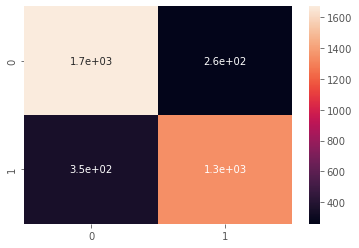

In [591]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

#### Classification Report

In [592]:
# print classification report 
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1930
           1       0.84      0.79      0.82      1693

    accuracy                           0.83      3623
   macro avg       0.83      0.83      0.83      3623
weighted avg       0.83      0.83      0.83      3623



In [593]:
confusion_df= pd.crosstab(y_test,pd.Series(random_search_predictions),rownames=['Actual'],colnames=['Pred'])
confusion_df

Pred,0,1
Actual,,
0,1669,261
1,349,1344


In [594]:
# Define elements of confusion matrix for later use in A/B testing
tp = confusion_df.loc[1,1]
tn = confusion_df.loc[0,0]
fp = confusion_df.loc[0,1]
fn = confusion_df.loc[1,0]

In [595]:
# print the accuracy of the model
random_search_predictions = random_search.predict(X_test)
accuracy_score(y_test, random_search_predictions)

0.8316312448247308

### Save model for deployment

In [596]:
# Save model
final_model = random_search 
filename = 'final_churning_model'
joblib.dump(final_model, filename)

['final_churning_model']

### Scoring New Data

In [597]:
scoredata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409 entries, 4071 to 13935
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   CustomerKey                               6409 non-null   int64         
 1   OrderQuantity_sum                         6409 non-null   float64       
 2   OrderQuantity_mean                        6409 non-null   float64       
 3   OrderQuantity_median                      6409 non-null   float64       
 4   OrderQuantity_min                         6409 non-null   float64       
 5   OrderQuantity_max                         6409 non-null   float64       
 6   Total Sales_sum                           6409 non-null   float64       
 7   Total Sales_mean                          6409 non-null   float64       
 8   Total Sales_median                        6409 non-null   float64       
 9   Total Sales_min           

In [598]:
scoredata.head().transpose()

,4071,14598,11148,10998,8239
CustomerKey,15071,25598,22148,21998,19239
OrderQuantity_sum,2.00,4.00,1.00,2.00,2.00
OrderQuantity_mean,1.00,4.00,1.00,2.00,2.00
OrderQuantity_median,1.00,4.00,1.00,2.00,2.00
OrderQuantity_min,1.00,4.00,1.00,2.00,2.00
OrderQuantity_max,1.00,4.00,1.00,2.00,2.00
Total Sales_sum,2746.55,1151.76,69.99,56.98,78.98
Total Sales_mean,1373.28,1151.76,69.99,56.98,78.98
Total Sales_median,1373.28,1151.76,69.99,56.98,78.98
Total Sales_min,564.99,1151.76,69.99,56.98,78.98


In [599]:
# double check for missing values and duplicates

scoredata.isnull().sum()[modeldata.isnull().sum()!=0]

Days Passed_mean      3647
Days Passed_median    3647
Days Passed_min       3647
Days Passed_max       3647
dtype: int64

In [600]:
# Double check for duplicates
print('Number of duplicates:',modeldata.duplicated().sum())

Number of duplicates: 0


In [601]:
# Delete fields that are of no use for our modelling
# Exclude Customer_id from deleted list so we can idetify churning customers later on
todrop.remove('CustomerKey')
todrop = todrop + ['Churn']
scoredata.drop(todrop, axis = 1, inplace= True)

In [602]:
for var in cat:
 print(scoredata[var].value_counts())

9     1229
8      886
10     807
6      799
5      790
7      745
4      570
11     419
3      164
Name: RFM_Score, dtype: int64
Silver    2860
Gold      2323
Bronze     807
Nickel     419
Name: RFM_status, dtype: int64
244    512
144    501
221    486
142    443
344    419
242    417
321    387
243    377
121    349
342    341
143    329
343    295
123    265
211    178
223    173
111    164
323    107
311    107
113    102
222     96
122     85
322     70
213     45
112     43
124     35
224     26
313     17
324     10
212     10
341      7
241      5
114      3
214      2
312      2
141      1
Name: RFM_Segment, dtype: int64
0    2371
1    2053
2    1586
3     399
Name: RFM_cluster, dtype: int64
M    3507
S    2902
Name: MaritalStatus, dtype: int64
M    3254
F    3155
Name: Gender, dtype: int64
0    1824
2    1312
1    1203
4     784
3     760
5     526
Name: Total_Children, dtype: int64
0    3858
1     827
2     545
4     413
3     402
5     364
Name: Children_at_Home, dtype: int6

C:\Users\Laptop\AppData\Local\Temp/ipykernel_10004/1917242654.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


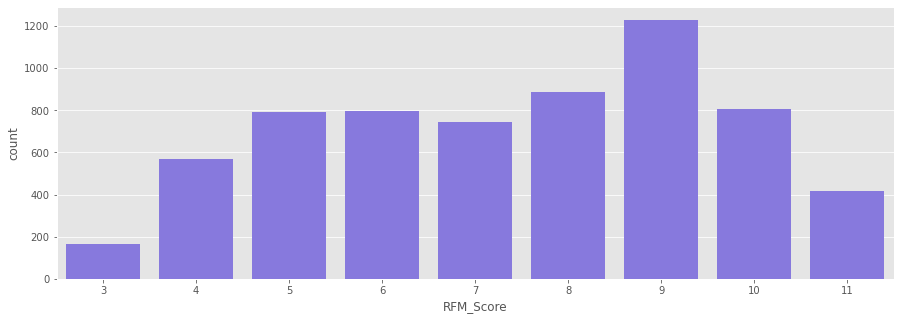

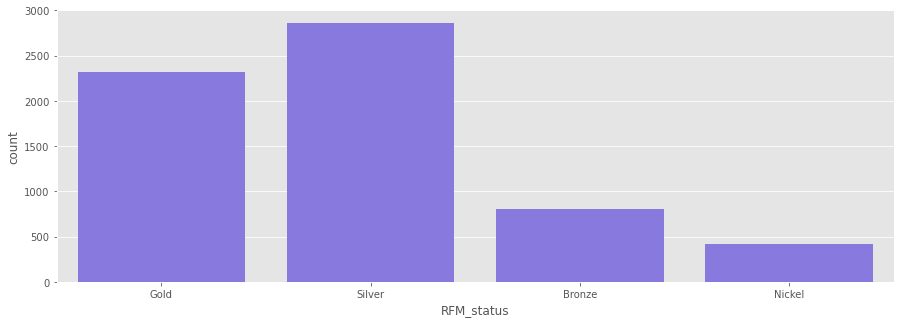

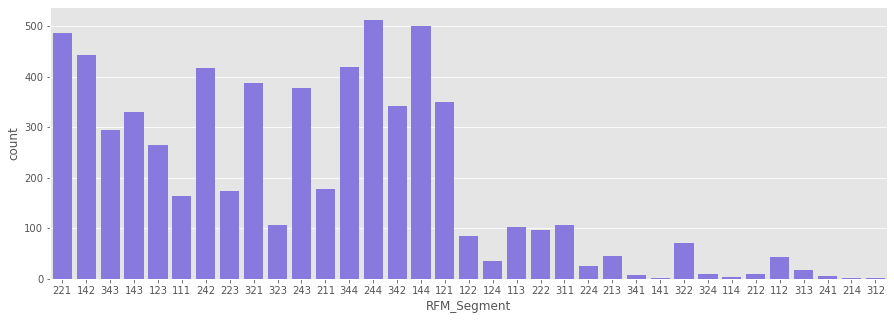

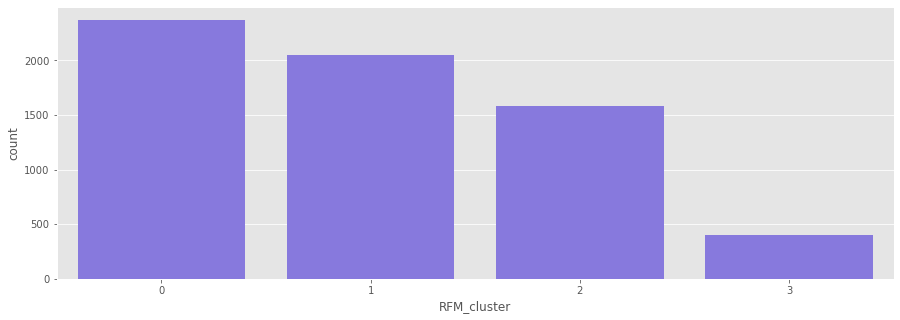

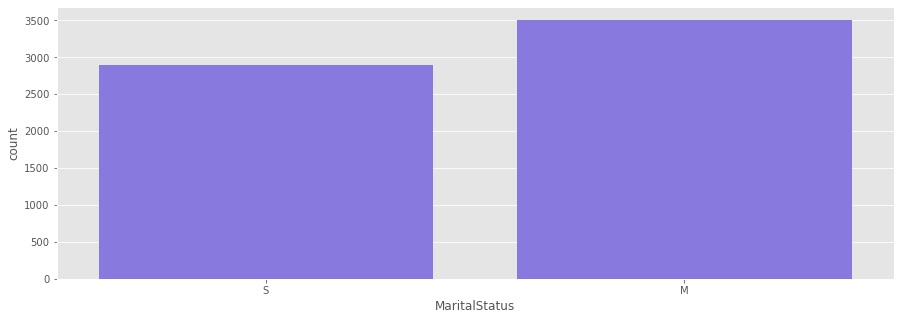

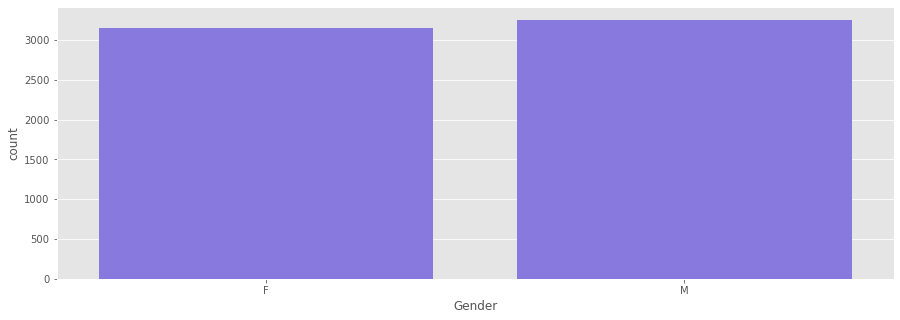

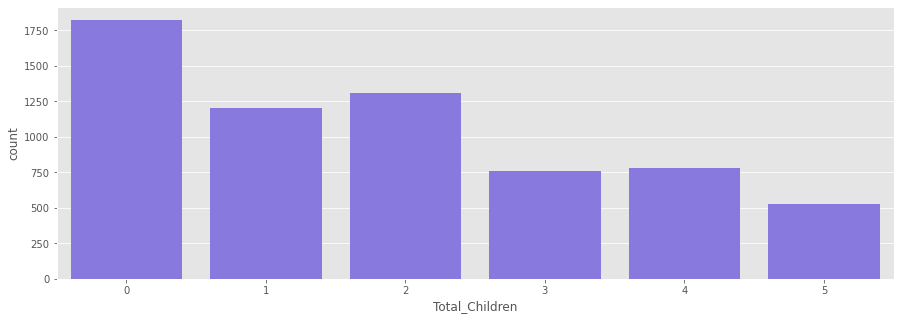

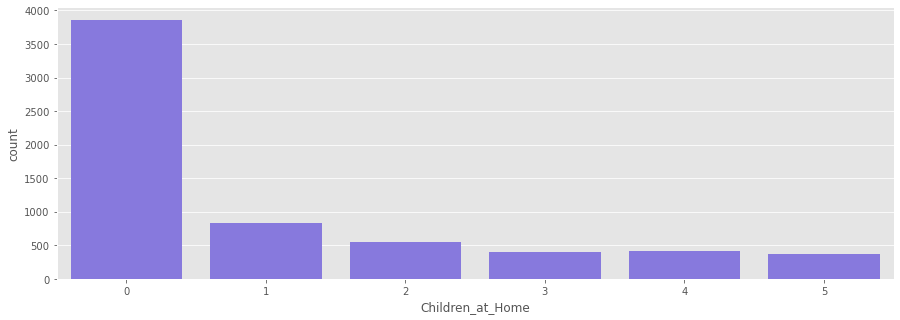

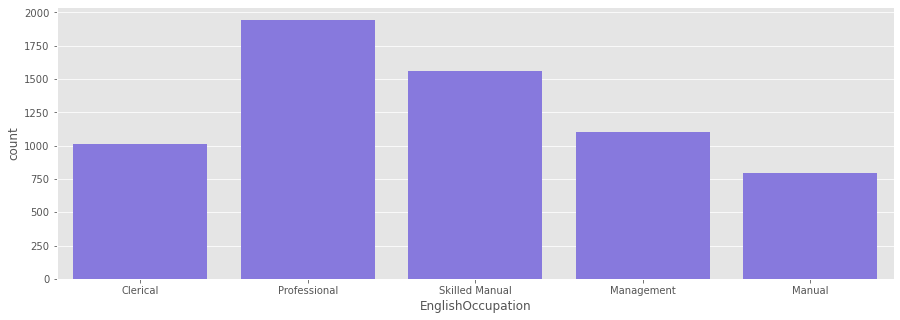

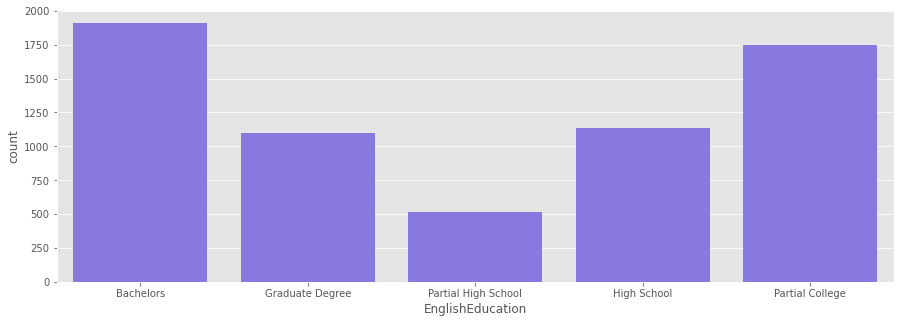

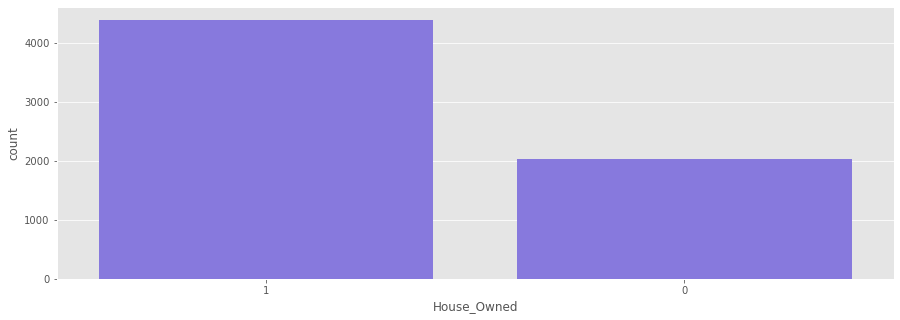

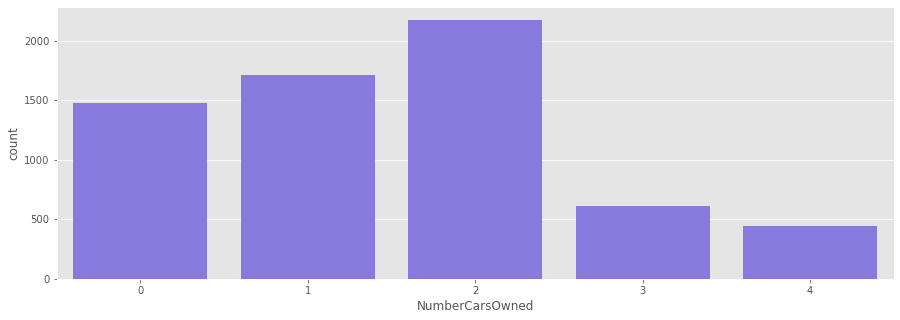

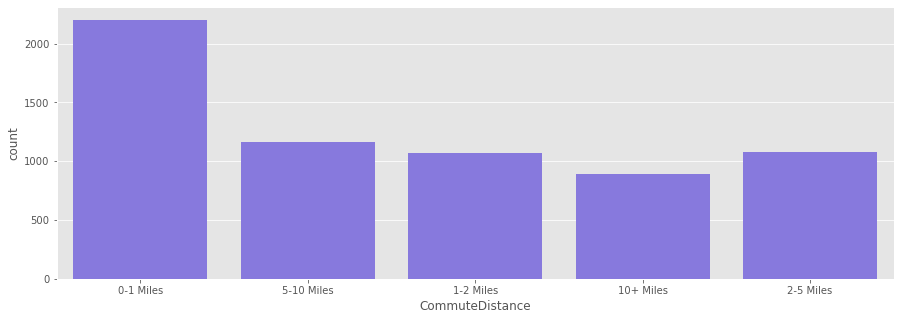

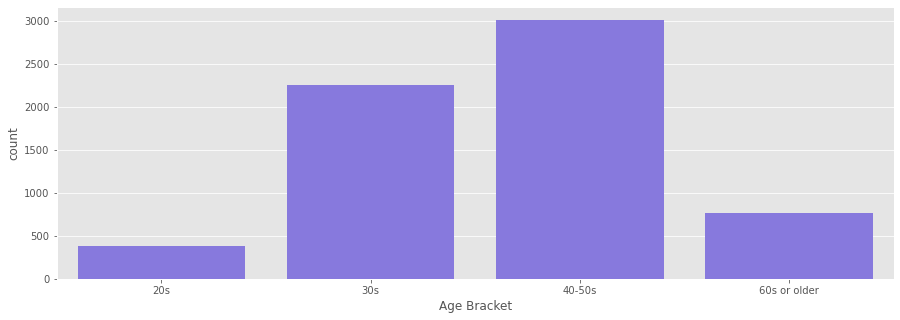

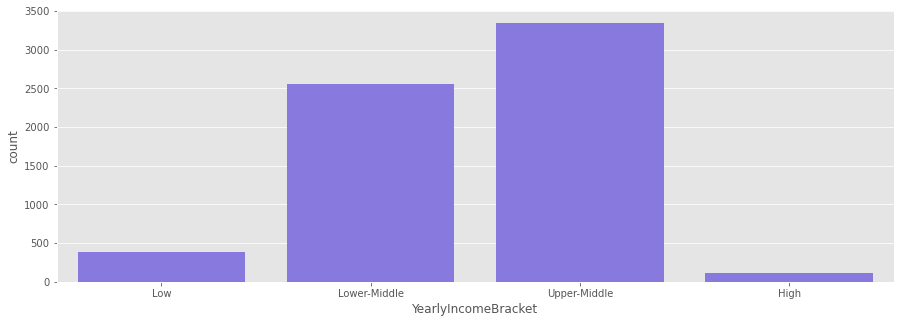

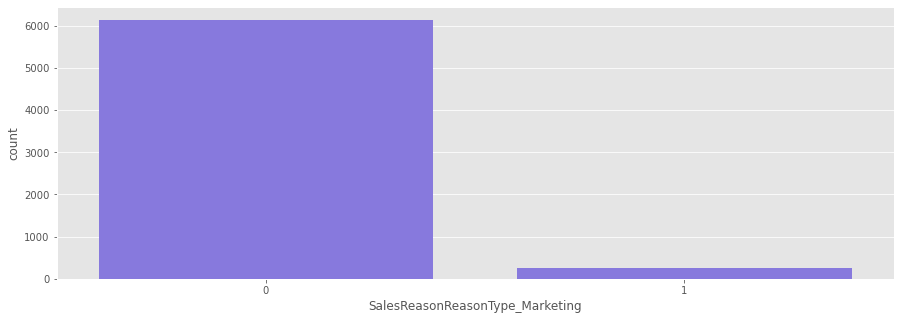

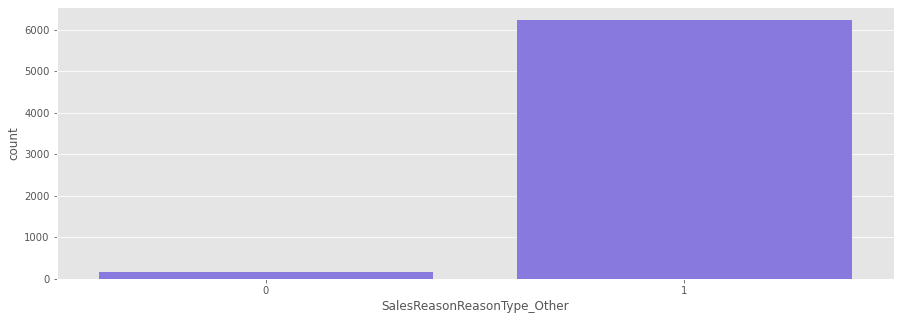

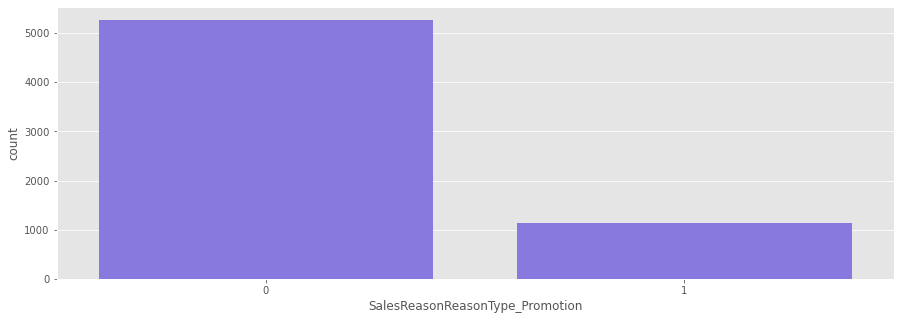

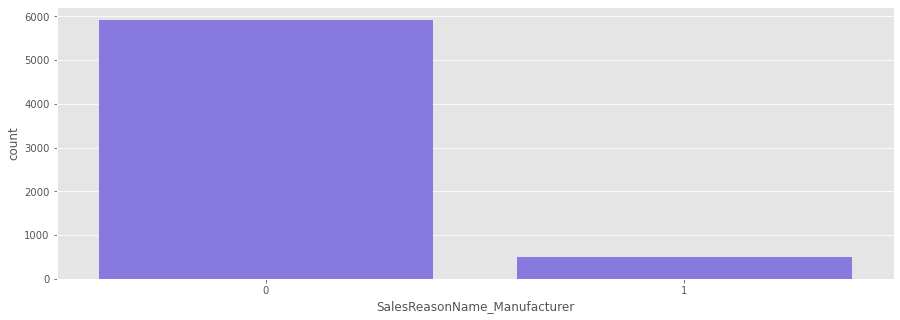

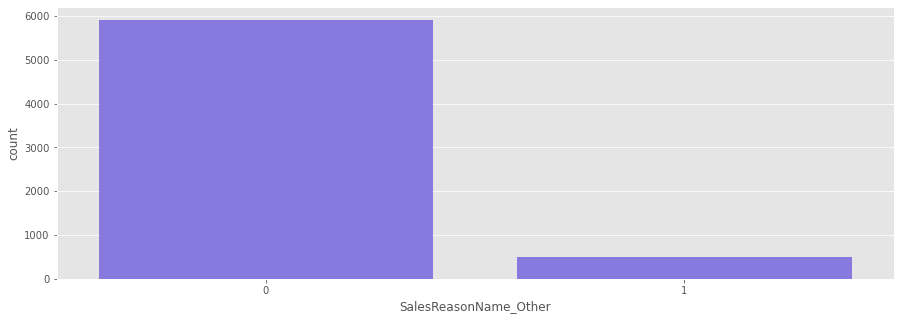

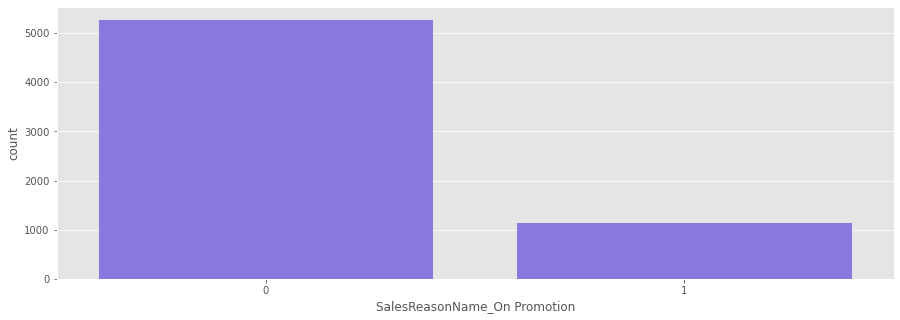

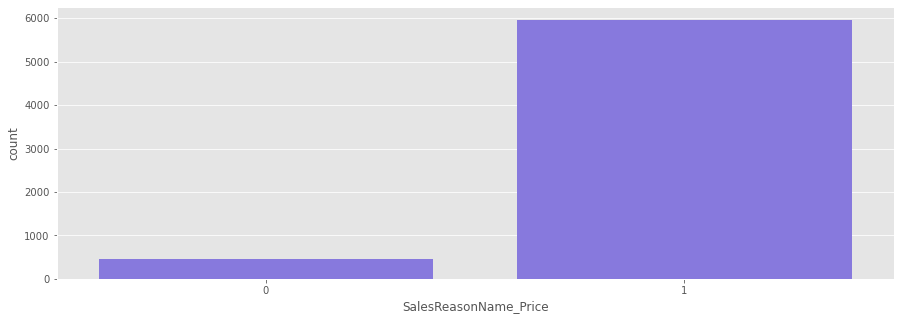

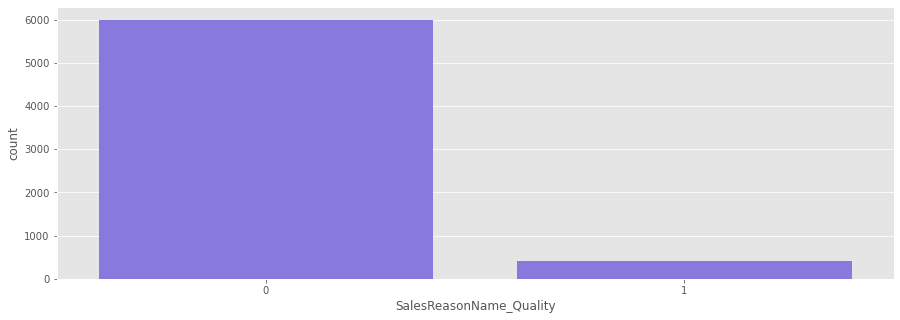

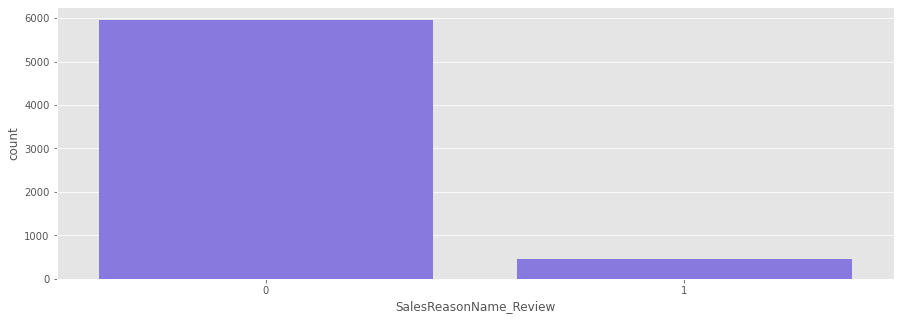

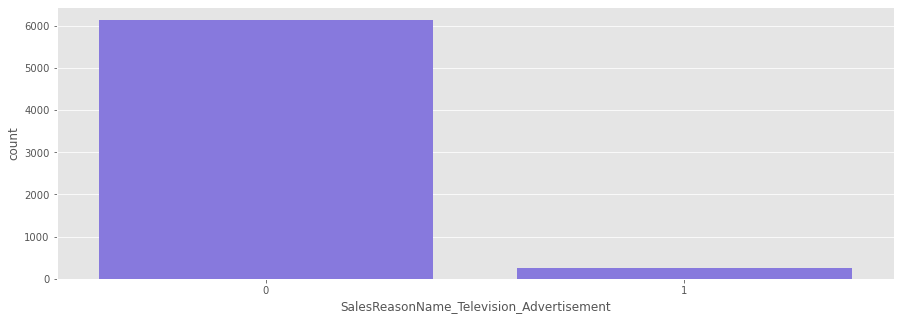

In [603]:
cat_df = scoredata[cat]
plt.rcParams['figure.figsize'] = (15, 5) # Chart sizes

for i, col in enumerate(cat_df.columns):
   plt.figure(i)
   sns.countplot(x=col, data=cat_df, color = 'mediumslateblue')

In [604]:
# Encode categorical data beside drivers which are already binary
encoded_score_data = pd.get_dummies(scoredata,columns = [v for v in dummies],drop_first=False)

In [605]:
encoded_score_var = list(encoded_score_data.columns)
encoded_score_var

['CustomerKey',
 'OrderQuantity_sum',
 'OrderQuantity_mean',
 'OrderQuantity_median',
 'OrderQuantity_max',
 'Total Sales_mean',
 'Total Sales_median',
 'Total Sales_min',
 'Total Sales_max',
 'Profit_sum',
 'Profit_mean',
 'Profit_median',
 'Profit_min',
 'Profit_max',
 'Recency',
 'Frequency',
 'Monetary',
 'Tenure_Months',
 'YearlyIncome',
 'age',
 'SalesReasonReasonType_Marketing',
 'SalesReasonReasonType_Other',
 'SalesReasonReasonType_Promotion',
 'SalesReasonName_Manufacturer',
 'SalesReasonName_On Promotion',
 'SalesReasonName_Other',
 'SalesReasonName_Price',
 'SalesReasonName_Quality',
 'SalesReasonName_Review',
 'SalesReasonName_Television_Advertisement',
 'RFM_Score_3',
 'RFM_Score_4',
 'RFM_Score_5',
 'RFM_Score_6',
 'RFM_Score_7',
 'RFM_Score_8',
 'RFM_Score_9',
 'RFM_Score_10',
 'RFM_Score_11',
 'RFM_status_Gold',
 'RFM_status_Silver',
 'RFM_status_Bronze',
 'RFM_status_Nickel',
 'RFM_Segment_111',
 'RFM_Segment_112',
 'RFM_Segment_113',
 'RFM_Segment_114',
 'RFM_Segment

In [606]:
cont = [v for v in cols if v not in cat and v not in todrop and v != 'CustomerKey']

In [607]:
# Get quick stats
encoded_score_data[cont].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OrderQuantity_sum,6409.00,3.55,3.07,1.00,2.00,3.00,4.00,65.00
OrderQuantity_mean,6409.00,2.26,0.89,1.00,1.67,2.00,3.00,7.00
OrderQuantity_median,6409.00,2.25,0.91,1.00,1.50,2.00,3.00,7.00
OrderQuantity_max,6409.00,2.65,1.10,1.00,2.00,3.00,3.00,8.00
Total Sales_mean,6409.00,874.78,991.47,2.29,40.63,135.46,1735.98,3072.53
Total Sales_median,6409.00,873.49,991.09,2.29,39.98,135.46,1739.46,3072.53
Total Sales_min,6409.00,714.92,852.50,2.29,36.59,134.93,1173.96,2566.80
Total Sales_max,6409.00,1036.60,1208.36,2.29,49.97,161.29,2319.99,3578.27
Profit_sum,6409.00,686.89,925.47,1.43,30.66,145.37,1120.90,5273.81
Profit_mean,6409.00,361.45,407.01,1.43,24.71,83.55,707.35,1303.19


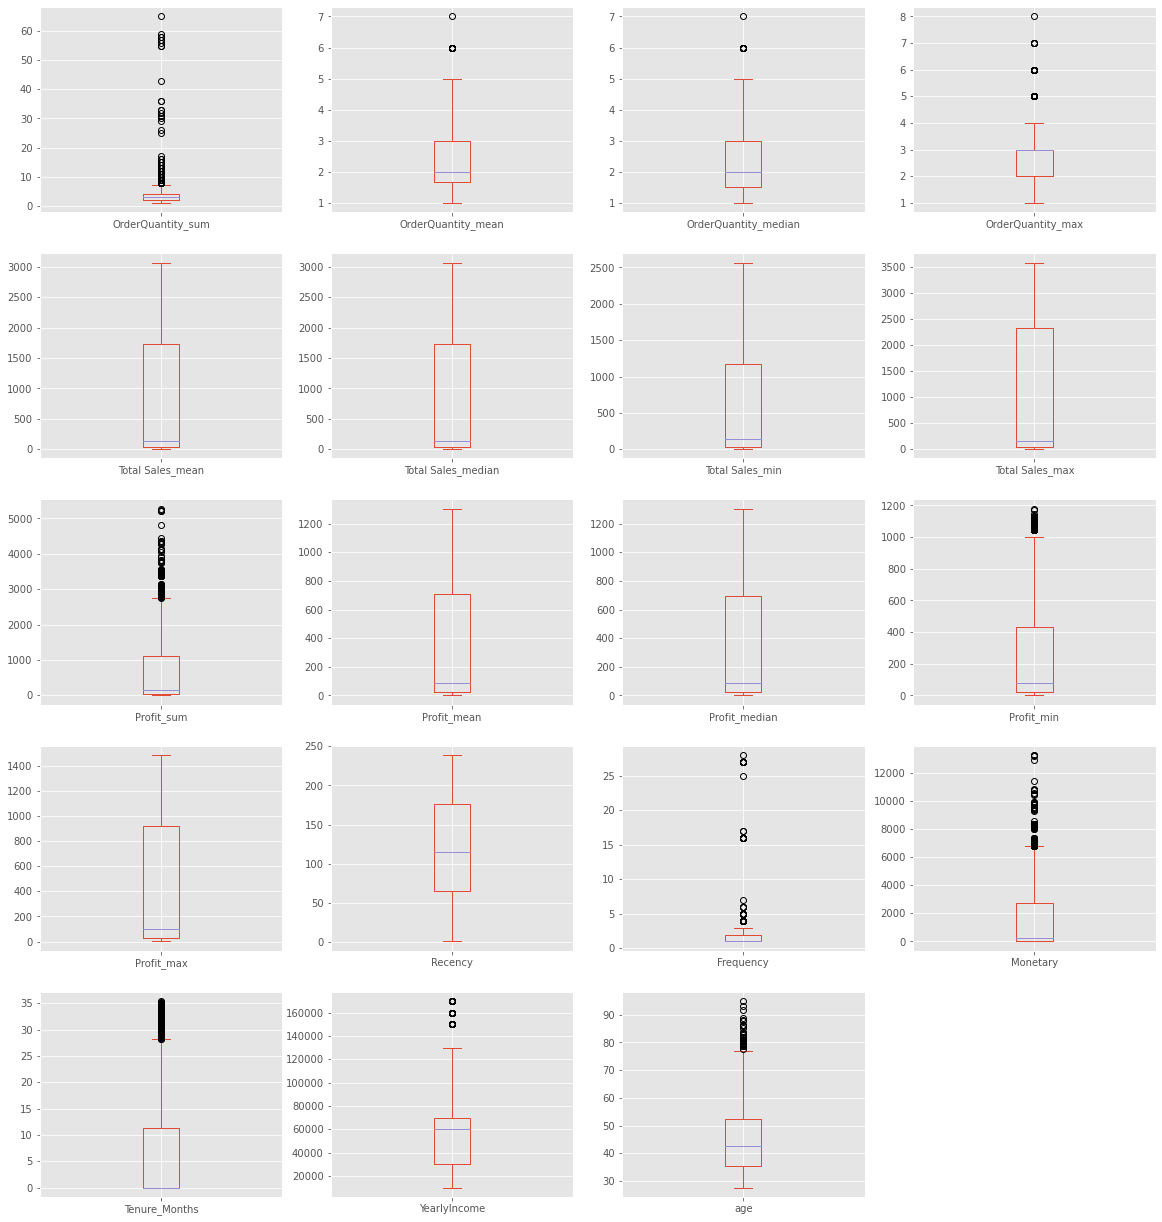

In [608]:
# Plot boxplots
encoded_score_data[cont].plot(kind='box',subplots=True,figsize=(20,40),
                              layout=(9,4), sharex=False, sharey=False)
plt.show()

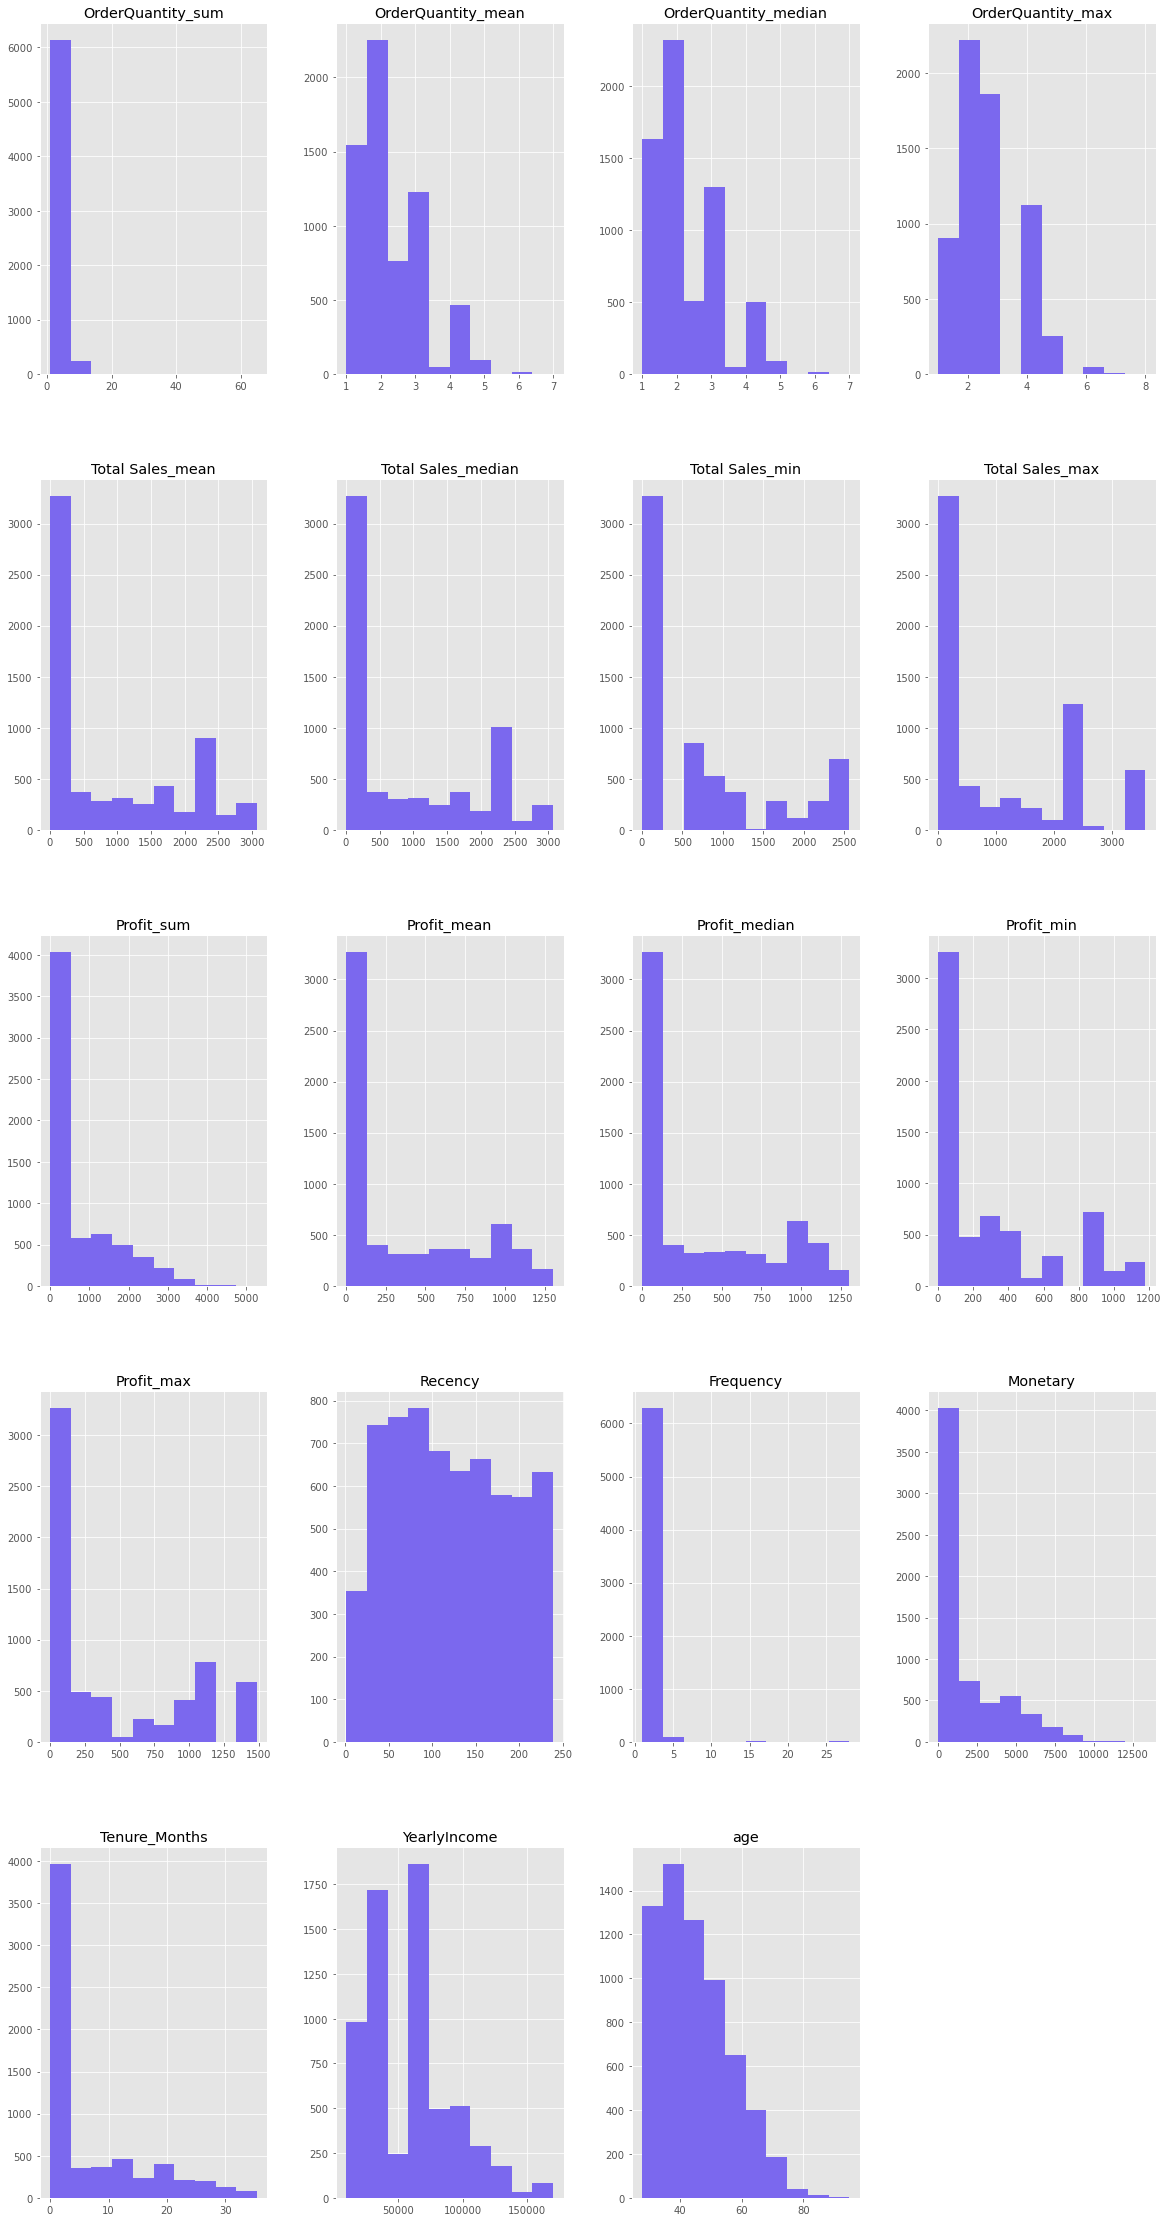

In [609]:
# plot histogram
encoded_score_data[cont].hist(figsize=(20,40), color = 'mediumslateblue')
pass

#### Feature Selection

In [610]:
# double check for data type
encoded_score_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409 entries, 4071 to 13935
Columns: 128 entries, CustomerKey to YearlyIncomeBracket_High
dtypes: float64(18), int64(2), uint8(108)
memory usage: 1.9 MB


In [611]:
# Check if all encoded features of model dataset are included in score dataset
result = all(v in encoded_score_var for v in final_features)
if result:
    print('All encoded features of model dataset are included in score dataset.')
else:
    print('Not all encoded features of model dataset are included in score dataset.')

Not all encoded features of model dataset are included in score dataset.


In [612]:
# Find which encoded features are not present in score dataset
missing_var = set(final_features) - set(encoded_score_var)
missing_var

{'RFM_Segment_442'}

In [613]:
# Create missing fields and assign 0 to all rows
for v in missing_var:
    encoded_score_data[v] = 0

In [614]:
# Create the final score dataframe with all selected features and Customer id
score_data_df = encoded_score_data[final_features]
score_data_df.insert(0, 'CustomerKey', encoded_score_data['CustomerKey'])
score_data_df.head()

,CustomerKey,RFM_cluster_2,RFM_status_Nickel,RFM_cluster_1,RFM_Segment_442,Total Sales_median
4071,15071,0,0,0,0,1373.28
14598,25598,0,0,1,0,1151.76
11148,22148,1,0,0,0,69.99
10998,21998,1,0,0,0,56.98
8239,19239,0,0,1,0,78.98


### Model Deployment

In [615]:
loaded_model = joblib.load('final_churning_model')
loaded_model

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [80, 90, 100, 110, 115,
                                                         120]})

In [616]:
# Make predictions
features = score_data_df.loc[:, score_data_df.columns != 'CustomerKey']
predictions = loaded_model.predict(features)
# Add a new column to the dataframe with the predictions
score_data_df.insert(1, "Churn", predictions, True)
score_data_df.head()

,CustomerKey,Churn,RFM_cluster_2,RFM_status_Nickel,RFM_cluster_1,RFM_Segment_442,Total Sales_median
4071,15071,0,0,0,0,0,1373.28
14598,25598,0,0,0,1,0,1151.76
11148,22148,0,1,0,0,0,69.99
10998,21998,0,1,0,0,0,56.98
8239,19239,0,0,0,1,0,78.98


In [617]:
# Show how many customers are predicted to churn (1) and not to churn (0)
score_data_df.groupby('Churn').size()

Churn
0    5568
1     841
dtype: int64

In [618]:
# Filter potential churners
predicted_churners = score_data_df[score_data_df['Churn'] == 1]

In [619]:
# Export the dataframe to a csv file
filename = 'Predicted churners.csv'
csv_file = predicted_churners.to_csv(filename, index = None, header = True)

### A/B Testing

#### Maximium Profit

In [620]:
max(df['OrderDate'])

Timestamp('2014-01-28 00:00:00')

In [621]:
min(df['OrderDate'])

Timestamp('2010-12-29 00:00:00')

In [622]:
# Summarise sales by Order Date
daily_sales = df.groupby('OrderDate').agg({'Total Sales':'sum'})
daily_sales.head()

,Total Sales
OrderDate,
2010-12-29,14477.34
2010-12-30,13931.52
2010-12-31,15012.18
2011-01-01,7156.54
2011-01-02,15012.18


In [623]:
# Summarise data by monthly sales
monthly_sales = daily_sales.resample('MS').sum()
monthly_sales.head()

,Total Sales
OrderDate,
2010-12-01,43421.04
2011-01-01,469823.91
2011-02-01,466334.90
2011-03-01,485198.66
2011-04-01,502073.85


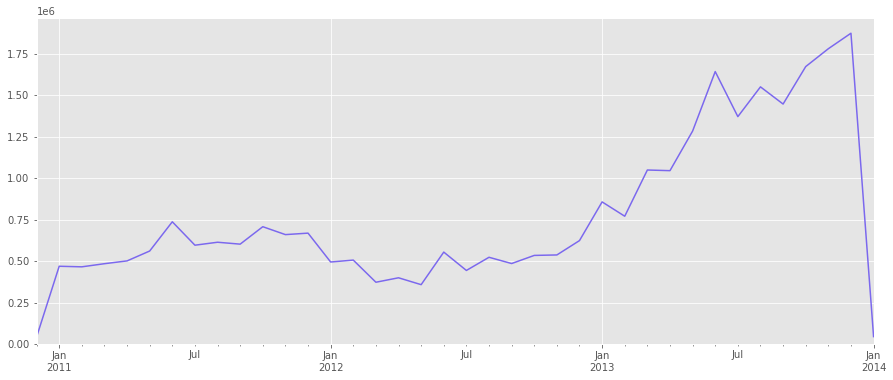

In [624]:
# Plot data
ax = monthly_sales['Total Sales'].plot(figsize=(15, 6), color = 'mediumslateblue')
ax.xaxis.set_label_text("")
ax.set_ylim(ymin=0)
pass

#### Annual Customer Revenue

In [625]:
# Calculate revenue per customer for each of the 3 full years
df = df.set_index('OrderDate')
df1 = df['2011-01-01' : '2011-12-31']
df2 = df['2012-01-01' : '2012-12-31']
df3 = df['2013-01-01' : '2013-12-31']
df_list = [df1, df2, df3]

rev_list = []
for df in df_list:
    #rev = sum(df['Total Sales'])
    #customer_num = len(df['CustomerKey'])
    customer_rev = sum(df['Total Sales'])/len(df['CustomerKey'])
    rev_list.append(customer_rev)
    
# Calculate average annual revenue per customer
annual_customer_rev = sum(rev_list)/len(rev_list)
annual_customer_rev

1740.8350016697468

In [626]:
# Let's assume there is a cost per customer
# E.g. a voucher to entice customers could be considered mitigation cost
mitigation_cost = 350
# Alternatively we could set cost to be 5% of the average annual customer revenue
# mitigation_cost = annual_customer_rev * 0.05

In [627]:
# Calculate profit for baseline and model scenarios
baseline_spend = mitigation_cost * (tp + tn + fp + fn)
baseline_rev = annual_customer_rev * (tp + fn)
baseline_profit = baseline_rev - baseline_spend 

model_spend = mitigation_cost * (tp + fp)
model_rev = annual_customer_rev * tp
model_profit = model_rev - model_spend 

print(' ', int(baseline_profit))
print('If we targeted only the predicted churners with an effective mitigation strategy, the profit would be',int(model_profit))
print('This is an improvement of {:0.2f}%'.format((model_profit-baseline_profit)/baseline_profit*100))

If we targeted all customers with an effective mitigation strategy, the profit would be 1679183
If we targeted only the predicted churners with an effective mitigation strategy, the profit would be 1777932
This is an improvement of 5.88%


#### Maximium Return

In [628]:
# Goal: Maximum return on investment; our metric in this case is precision
# Calculate baseline and model return
baseline_return = (baseline_rev - baseline_spend) / baseline_spend *100
model_return = (model_rev - model_spend) / model_spend *100

In [629]:
print('If we targeted all customers with an effective mitigation strategy, the return on investment would be {:0.2f}%'.format(baseline_return))
print('If we targeted only the predicted churners with an effective mitigation strategy, the return on investment would be {:0.2f}%'.format(model_return))

If we targeted all customers with an effective mitigation strategy, the return on investment would be 132.42%
If we targeted only the predicted churners with an effective mitigation strategy, the return on investment would be 316.50%


In [630]:
# Estimate commercial value if our strategy is successful in preventing churning
int(annual_customer_rev * len(predicted_churners))

1464042